In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# import warnings
# warnings.filterwarnings("ignore")
# warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10, 6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

from warnings import simplefilter

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

from os.path import exists
simplefilter('ignore')
SEED = 41
np.random.seed(SEED)
# plt.style.use('ggplot')
    
if not exists ('/kaggle/input/used-car-price-prediction-competition'):
    base_path = ('/kaggle/input/used-car-price-prediction-competition2')
else:
    base_path = ('/kaggle/input')
    
train = pd.read_csv(base_path + '/train.csv', index_col=0)
test = pd.read_csv(base_path + '/test.csv', index_col=0)
submission = pd.read_csv(base_path + '/Sample_Submition.csv')

/kaggle/input/used-car-price-prediction-competition2/Sample_Submition.csv
/kaggle/input/used-car-price-prediction-competition2/train.csv
/kaggle/input/used-car-price-prediction-competition2/test.csv


In [2]:
train.head()

,id,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,lat,long,posting_date,price
121610,7309831550,2007.00,infiniti,m45,excellent,NaN,gas,214740.00,clean,automatic,rwd,NaN,sedan,black,ga,34.14,-83.97,2021-04-20T11:46:13-0400,7995
395646,7317007429,2008.00,cadillac,escalade,NaN,NaN,gas,170276.00,clean,automatic,NaN,NaN,SUV,black,wa,47.76,-122.21,2021-05-04T16:16:32-0700,14999
236366,7309202024,2003.00,lexus,es,NaN,NaN,gas,176910.00,clean,automatic,fwd,NaN,sedan,NaN,nc,34.21,-77.84,2021-04-19T10:07:58-0400,5995
66001,7306341714,2017.00,bmw,320i,excellent,NaN,gas,41000.00,clean,automatic,4wd,NaN,SUV,NaN,ca,33.81,-117.85,2021-04-13T13:05:06-0700,0
320855,7307880118,2008.00,toyota,rav4,good,6 cylinders,gas,138900.00,clean,automatic,4wd,full-size,SUV,silver,pa,40.14,-76.60,2021-04-16T15:22:02-0400,7995


In [3]:
train.describe()

,id,year,odometer,lat,long,price
count,290129.00,290129.00,290129.00,285726.00,285726.00,290129.00
mean,7311503279.06,2011.36,97642.41,38.51,-94.62,51933.00
std,4378450.26,9.15,205897.00,5.83,18.32,9591680.31
min,7301583321.00,1900.00,0.00,-84.12,-159.83,0.00
25%,7308154295.00,2008.00,38000.00,34.60,-111.92,5991.00
50%,7312664164.00,2014.00,85615.00,39.17,-88.21,13990.00
75%,7315255273.00,2017.00,133436.00,42.41,-80.83,26500.00
max,7317101084.00,2022.00,10000000.00,82.25,173.89,3736928711.00


In [4]:
train.duplicated().sum()

0

In [5]:
train.drop(columns='id').duplicated().sum()  # There can be duplicated rows!!!

234

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290129 entries, 121610 to 305711
Data columns (total 19 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            290129 non-null  int64  
 1   year          290129 non-null  float64
 2   manufacturer  278787 non-null  object 
 3   model         290129 non-null  object 
 4   condition     174025 non-null  object 
 5   cylinders     170829 non-null  object 
 6   fuel          288676 non-null  object 
 7   odometer      290129 non-null  float64
 8   title_status  285063 non-null  object 
 9   transmission  290129 non-null  object 
 10  drive         202042 non-null  object 
 11  size          82445 non-null   object 
 12  type          227533 non-null  object 
 13  paint_color   203016 non-null  object 
 14  state         290129 non-null  object 
 15  lat           285726 non-null  float64
 16  long          285726 non-null  float64
 17  posting_date  290129 non-null  object 
 18 

In [7]:
round(train.isnull().sum() / train.shape[0] * 100, 2).sort_values()

id              0.00
state           0.00
posting_date    0.00
odometer        0.00
transmission    0.00
model           0.00
year            0.00
price           0.00
fuel            0.50
lat             1.52
long            1.52
title_status    1.75
manufacturer    3.91
type           21.58
paint_color    30.03
drive          30.36
condition      40.02
cylinders      41.12
size           71.58
dtype: float64

In [8]:
nulls = train[["id", "state", "posting_date", "odometer", "transmission", "model", 
       "year", "price", "fuel", "lat", "long", "title_status", "manufacturer", 
       "type", "paint_color", "drive", "condition", "cylinders", "size"]].isnull()

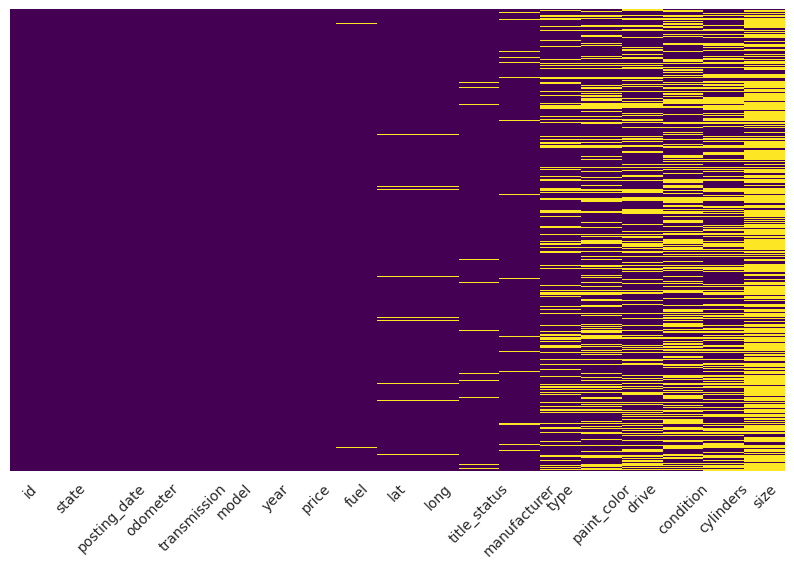

In [9]:
sns.heatmap(nulls, yticklabels=False, cbar=False, cmap='viridis');
plt.xticks(rotation=45)
plt.show()

In [10]:
test

,id,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,lat,long,posting_date
316575,7313399730,2018.00,honda,civic,NaN,4 cylinders,gas,28898.00,clean,automatic,fwd,NaN,sedan,NaN,or,44.97,-123.02,2021-04-27T10:09:18-0700
97903,7308035814,2017.00,cadillac,cts 2.0 luxury sedan 4d,good,NaN,gas,41147.00,clean,other,NaN,NaN,sedan,red,fl,28.04,-81.96,2021-04-16T20:21:00-0400
357880,7317063645,2006.00,toyota,sienna,excellent,6 cylinders,gas,165500.00,clean,automatic,NaN,NaN,mini-van,grey,tx,32.74,-97.08,2021-05-04T20:45:23-0500
413008,7310376764,2016.00,mitsubishi,outlander sel sport,good,NaN,other,29430.00,clean,other,NaN,NaN,SUV,white,wi,43.70,-87.74,2021-04-21T11:20:50-0500
330300,7309848062,2017.00,audi,a6 3.0t premium plus sedan,good,6 cylinders,gas,24238.00,clean,automatic,NaN,NaN,sedan,white,pa,40.79,-77.85,2021-04-20T12:10:51-0400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221602,7306681704,2015.00,ram,3500,excellent,6 cylinders,diesel,123000.00,clean,automatic,rwd,NaN,NaN,white,mt,48.20,-114.30,2021-04-14T09:29:57-0600
353429,7315798680,2007.00,nissan,murano.awd,NaN,NaN,gas,150000.00,rebuilt,automatic,NaN,NaN,NaN,NaN,tx,30.24,-97.77,2021-05-02T11:47:54-0500
284120,7314818147,2015.00,dodge,dart sxt,excellent,4 cylinders,gas,90430.00,clean,automatic,fwd,NaN,NaN,white,oh,41.56,-81.57,2021-04-30T11:22:19-0400
273569,7308055654,2001.00,chevrolet,2500,NaN,NaN,gas,137000.00,clean,automatic,NaN,NaN,NaN,NaN,ny,42.19,-78.04,2021-04-16T21:15:13-0400


In [11]:
test.describe()

,id,year,odometer,lat,long
count,124341.00,124341.00,124341.00,122380.00,122380.00
mean,7311461560.46,2011.36,97705.89,38.51,-94.63
std,4395352.48,9.16,203002.40,5.83,18.33
min,7301583353.00,1900.00,0.00,-74.18,-159.59
25%,7308069236.00,2008.00,38000.00,34.71,-111.92
50%,7312518630.00,2014.00,85765.00,39.17,-88.34
75%,7315245906.00,2017.00,133812.00,42.43,-80.82
max,7317096748.00,2022.00,10000000.00,80.68,167.63


In [12]:
test.duplicated().sum()

0

In [13]:
test[['year', 'manufacturer', 'model', 'condition', 'cylinders', 'fuel',
       'odometer', 'title_status', 'transmission', 'drive', 'size', 'type',
       'paint_color', 'state', 'lat', 'long']].duplicated().sum()

14755

In [14]:
test.drop(columns='id').duplicated().sum()  # There can be duplicated rows!!!

30

In [15]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 124341 entries, 316575 to 190395
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            124341 non-null  int64  
 1   year          124341 non-null  float64
 2   manufacturer  119488 non-null  object 
 3   model         124341 non-null  object 
 4   condition     74522 non-null   object 
 5   cylinders     72970 non-null   object 
 6   fuel          123696 non-null  object 
 7   odometer      124341 non-null  float64
 8   title_status  122132 non-null  object 
 9   transmission  124341 non-null  object 
 10  drive         86569 non-null   object 
 11  size          35237 non-null   object 
 12  type          97522 non-null   object 
 13  paint_color   86774 non-null   object 
 14  state         124341 non-null  object 
 15  lat           122380 non-null  float64
 16  long          122380 non-null  float64
 17  posting_date  124341 non-null  object 
dtyp

In [16]:
round(test.isnull().sum() / test.shape[0] * 100, 2).sort_values()

id              0.00
state           0.00
transmission    0.00
odometer        0.00
posting_date    0.00
model           0.00
year            0.00
fuel            0.52
long            1.58
lat             1.58
title_status    1.78
manufacturer    3.90
type           21.57
paint_color    30.21
drive          30.38
condition      40.07
cylinders      41.31
size           71.66
dtype: float64

## Data Cleaning

In [17]:
df = train.copy()

In [18]:
df.head(3)

,id,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,lat,long,posting_date,price
121610,7309831550,2007.00,infiniti,m45,excellent,NaN,gas,214740.00,clean,automatic,rwd,NaN,sedan,black,ga,34.14,-83.97,2021-04-20T11:46:13-0400,7995
395646,7317007429,2008.00,cadillac,escalade,NaN,NaN,gas,170276.00,clean,automatic,NaN,NaN,SUV,black,wa,47.76,-122.21,2021-05-04T16:16:32-0700,14999
236366,7309202024,2003.00,lexus,es,NaN,NaN,gas,176910.00,clean,automatic,fwd,NaN,sedan,NaN,nc,34.21,-77.84,2021-04-19T10:07:58-0400,5995


In [19]:
df.columns

Index(['id', 'year', 'manufacturer', 'model', 'condition', 'cylinders', 'fuel',
       'odometer', 'title_status', 'transmission', 'drive', 'size', 'type',
       'paint_color', 'state', 'lat', 'long', 'posting_date', 'price'],
      dtype='object')

In [20]:
df[['year', 'manufacturer', 'model', 'condition', 'cylinders', 'fuel',
       'odometer', 'title_status', 'transmission', 'drive', 'size', 'type',
       'paint_color', 'state', 'lat', 'long', 'price']].duplicated().sum()

54232

In [21]:
df[['year', 'manufacturer', 'model', 'condition', 'cylinders', 'fuel',
       'odometer', 'title_status', 'transmission', 'drive', 'size', 'type',
       'paint_color', 'state', 'lat', 'long', 'price']].drop_duplicates(inplace=True)

#### State

In [22]:
df[["state"]].sample(8)

,state
130084,id
364684,tx
342426,tn
269899,ny
230546,nc
193005,mi
233563,nc
75833,co


In [23]:
df["state"].value_counts(dropna=False)

ca    33985
fl    19344
tx    15600
ny    13400
oh    12288
mi    11771
or    11587
nc    10147
pa     9337
wa     9256
wi     7765
tn     7616
co     7495
va     7258
il     7170
nj     6643
id     6122
az     5946
ma     5617
ia     5583
mn     5314
ga     4815
ok     4518
sc     4288
mt     4248
ks     4176
in     3905
ct     3514
al     3357
md     3283
nm     3024
mo     2893
ky     2849
ar     2694
ak     2401
nv     2196
la     2188
dc     2082
nh     2044
me     1981
hi     1961
vt     1757
ri     1590
sd      899
ut      790
wv      731
ms      708
de      659
ne      651
wy      405
nd      278
Name: state, dtype: int64

#### Posting Date

In [24]:
print(df["posting_date"].dtype)

object


In [25]:
# Convert the "posting_date" column to datetime with the corrected format (including time zone offset)
df['posting_date'] = pd.to_datetime(df['posting_date'], utc=True)
print(df["posting_date"].dtype)

# Set the time zone to the desired one, for example, 'America/New_York'
df['posting_date'] = df['posting_date'].dt.tz_convert('America/New_York')  # UTC -04:00

# Create separate columns for date, year, month, day, and time
df['date'] = df['posting_date'].dt.date
df['posting_year'] = df['posting_date'].dt.year
df['month'] = df['posting_date'].dt.month
df['day'] = df['posting_date'].dt.day
df['time'] = df['posting_date'].dt.time
df["age"] = df["posting_year"] - df["year"]

datetime64[ns, UTC]


In [26]:
df["posting_date"].info()

<class 'pandas.core.series.Series'>
Int64Index: 290129 entries, 121610 to 305711
Series name: posting_date
Non-Null Count   Dtype                           
--------------   -----                           
290129 non-null  datetime64[ns, America/New_York]
dtypes: datetime64[ns, America/New_York](1)
memory usage: 4.4 MB


In [27]:
df["posting_date"].min(), df["posting_date"].max(), df["posting_date"].max() - df["posting_date"].min()

(Timestamp('2021-04-04 03:00:25-0400', tz='America/New_York'),
 Timestamp('2021-05-05 00:24:09-0400', tz='America/New_York'),
 Timedelta('30 days 21:23:44'))

In [28]:
df[["posting_date"]].sample(8)

,posting_date
212959,2021-05-03 17:02:44-04:00
37391,2021-04-16 10:21:41-04:00
14822,2021-04-29 08:10:08-04:00
121079,2021-04-13 12:12:25-04:00
221776,2021-04-07 19:00:47-04:00
86045,2021-05-01 13:20:03-04:00
63268,2021-04-19 13:42:17-04:00
172167,2021-05-03 16:05:41-04:00


In [29]:
df.sample(5)

,id,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,lat,long,posting_date,price,date,posting_year,month,day,time,age
208459,7316340709,2016.00,ford,f150 xlt,like new,6 cylinders,gas,83000.00,clean,automatic,4wd,full-size,truck,blue,mn,45.17,-93.19,2021-05-03 14:37:06-04:00,36999,2021-05-03,2021,5,3,14:37:06,5.00
322085,7306111812,2006.00,honda,accord 2-door coupe,fair,4 cylinders,gas,300000.00,clean,manual,fwd,NaN,coupe,NaN,pa,40.66,-75.47,2021-04-13 09:55:08-04:00,600,2021-04-13,2021,4,13,09:55:08,15.00
275713,7314754764,2015.00,nissan,sentra s,NaN,NaN,gas,60004.00,clean,automatic,NaN,NaN,NaN,NaN,nh,42.96,-70.83,2021-04-30 09:21:01-04:00,10800,2021-04-30,2021,4,30,09:21:01,6.00
16051,7311124024,2009.00,ford,flex,good,NaN,gas,99000.00,clean,automatic,fwd,full-size,SUV,grey,az,32.17,-110.97,2021-04-22 19:25:53-04:00,999,2021-04-22,2021,4,22,19:25:53,12.00
40060,7316050943,2018.00,jeep,wrangler,good,NaN,gas,83813.00,clean,other,NaN,full-size,SUV,black,ca,33.95,-117.30,2021-05-02 22:40:00-04:00,31995,2021-05-02,2021,5,2,22:40:00,3.00


#### Odometer

In [30]:
df[["odometer"]].sample(8)

,odometer
202809,133291.00
162337,18213.00
127698,190497.00
31069,49941.00
8316,164560.00
378939,151304.00
296904,165600.00
351183,2306.00


In [31]:
df["odometer"].describe()

count     290129.00
mean       97642.41
std       205897.00
min            0.00
25%        38000.00
50%        85615.00
75%       133436.00
max     10000000.00
Name: odometer, dtype: float64

#### Transmission

In [32]:
df[["transmission"]].sample(8)

,transmission
284898,automatic
50372,automatic
99180,automatic
413080,other
38294,automatic
257062,automatic
228642,manual
394877,automatic


In [33]:
df["transmission"].value_counts(dropna=False)

automatic    229671
other         43686
manual        16772
Name: transmission, dtype: int64

In [34]:
df['transmission'] = df['transmission'].replace('other', np.NaN)

#### Model

In [35]:
df[["model"]].sample(8)

,model
2552,tacoma double cab
285967,cr-v
166069,silverado 1500 lt z71
230706,sierra 2500hd
174487,f-350
94376,f-150 xlt
116363,escalade esv premium
251350,cobalt


In [36]:
df["model"].value_counts(dropna=False)

f-150                             5507
silverado 1500                    3483
1500                              2882
camry                             2137
silverado                         2101
                                  ... 
equinox premier automatic            1
300 s v6 rwd 8-speed automatic       1
1985 Peterbilt EXHD                  1
isuzu trooper 2.6 4WD                1
vibe base fwd 4dr wagon              1
Name: model, Length: 24300, dtype: int64

In [37]:
df["model"].value_counts(dropna=False).head(11567).values

array([5507, 3483, 2882, ...,    2,    2,    1])

In [38]:
df["model"].value_counts(dropna=False).tail(24300-11566)

acadia slt-1 107k 3rd row leather dvd backup camera    1
F250 super duty                                        1
forerunner                                             1
xjs v-12 convertible                                   1
2500 diesel truck 6.7l laramie mega cab one owner      1
                                                      ..
equinox premier automatic                              1
300 s v6 rwd 8-speed automatic                         1
1985 Peterbilt EXHD                                    1
isuzu trooper 2.6 4WD                                  1
vibe base fwd 4dr wagon                                1
Name: model, Length: 12734, dtype: int64

In [39]:
df.shape

(290129, 25)

In [40]:
# Get the not desired values from the tail of the value counts in the "model" column
drop_model = df["model"].value_counts(dropna=False).tail(12734).index

# Create a boolean mask to filter rows with not desired values in the 'model' column
mask_drop_model = df['model'].isin(drop_model)

# Drop rows where 'model' column has not desired values
df = df[~mask_drop_model]
df.shape

(277395, 25)

#### Price

In [41]:
df[["price"]].sample(8)

,price
329522,3299
118019,14999
129421,13995
17471,27995
390229,40994
275895,21099
329331,4650
102934,9500


In [42]:
df["price"].describe()

count       277395.00
mean         53079.53
std        9806015.12
min              0.00
25%           5995.00
50%          13995.00
75%          26750.00
max     3736928711.00
Name: price, dtype: float64

#### Fuel

In [43]:
df[["fuel"]].sample(8)

,fuel
102004,gas
388343,gas
98540,gas
111737,gas
45594,gas
209275,gas
10014,gas
169195,gas


In [44]:
df["fuel"].value_counts(dropna=False)

gas         232446
other        20401
diesel       18870
hybrid        3476
NaN           1123
electric      1079
Name: fuel, dtype: int64

In [45]:
df['fuel'] = df['fuel'].replace('other', np.NaN)

#### Title Status

In [46]:
df[["title_status"]].sample(8)

,title_status
329213,clean
269123,clean
118209,clean
343387,clean
274467,clean
33572,clean
88869,clean
321498,clean


In [47]:
df["title_status"].value_counts(dropna=False)

clean         264214
rebuilt         4654
NaN             4576
salvage         2556
lien             877
missing          403
parts only       115
Name: title_status, dtype: int64

#### Manufacturer

In [48]:
df[["manufacturer"]].sample(8)

,manufacturer
387296,toyota
121500,bmw
129387,gmc
257191,ford
17243,NaN
316886,mercedes-benz
25978,ford
198962,ford


In [49]:
df["manufacturer"].value_counts(dropna=False)

ford               46827
chevrolet          36309
toyota             22706
honda              14129
jeep               12734
nissan             12550
ram                11664
gmc                10885
bmw                 9733
dodge               9000
NaN                 8080
mercedes-benz       7456
hyundai             6966
subaru              6272
volkswagen          6140
kia                 5591
lexus               5509
audi                4938
cadillac            4644
chrysler            3984
acura               3983
buick               3672
mazda               3537
infiniti            3189
lincoln             2820
mitsubishi          2205
volvo               2114
mini                1601
pontiac             1485
jaguar              1279
rover               1164
porsche              894
mercury              765
saturn               689
alfa-romeo           606
tesla                574
fiat                 530
harley-davidson       63
ferrari               49
datsun                33


#### Type

In [50]:
df[["type"]].sample(8)

,type
255458,hatchback
44005,van
89375,sedan
241142,SUV
61662,SUV
400361,truck
102788,coupe
359682,pickup


In [51]:
df["type"].value_counts(dropna=False)

NaN            59433
sedan          57331
SUV            50746
pickup         28203
truck          23137
other          14027
coupe          12337
hatchback      11047
wagon           7040
van             5460
convertible     4825
mini-van        3144
offroad          365
bus              300
Name: type, dtype: int64

In [52]:
df['type'] = df['type'].replace('other', np.NaN)

#### Paint Color

In [53]:
df[["paint_color"]].sample(8)

,paint_color
327125,blue
342783,black
355043,white
142455,black
317109,NaN
263756,NaN
74778,white
162704,black


In [54]:
df["paint_color"].value_counts(dropna=False)

NaN       83027
white     51902
black     41408
silver    28332
blue      20497
red       20104
grey      15876
green      4668
custom     4345
brown      4236
yellow     1320
orange     1252
purple      428
Name: paint_color, dtype: int64

#### Drive

In [55]:
df[["drive"]].sample(8)

,drive
261330,4wd
77305,4wd
372816,NaN
151327,NaN
100891,NaN
257937,fwd
339174,rwd
287956,NaN


In [56]:
df["drive"].value_counts(dropna=False)

4wd    86075
NaN    84504
fwd    69485
rwd    37331
Name: drive, dtype: int64

#### Condition

In [57]:
df[["condition"]].sample(8)

,condition
332564,excellent
221375,NaN
357838,excellent
320833,good
170088,NaN
94878,good
203620,NaN
350221,excellent


In [58]:
df["condition"].value_counts(dropna=False)

NaN          111746
good          81558
excellent     65379
like new      13463
fair           4082
new             802
salvage         365
Name: condition, dtype: int64

#### Cylinders

In [59]:
df[["cylinders"]].sample(8)

,cylinders
288221,6 cylinders
369892,4 cylinders
6446,6 cylinders
72676,4 cylinders
140544,4 cylinders
129206,8 cylinders
358890,6 cylinders
348638,NaN


In [60]:
# Use a regular expression to extract the numeric part from the "cylinders" column
df['cylinders'] = df['cylinders'].str.replace(r'(\d+)\s*cylinders', r'\1', regex=True)

# Replace "other" with 1
df['cylinders'] = df['cylinders'].replace('other', np.nan)

# Convert the "cylinders" column to numeric type
df['cylinders'] = pd.to_numeric(df['cylinders'], errors='coerce')

# The "cylinders" column now contains the desired numeric values and NaN for missing values

In [61]:
df["cylinders"].value_counts(dropna=False)

NaN      115506
6.00      61816
4.00      51102
8.00      45873
5.00       1101
10.00       875
1.00        619
3.00        392
12.00       111
Name: cylinders, dtype: int64

#### Size

In [62]:
df[["size"]].sample(8)

,size
175976,NaN
183619,NaN
300532,NaN
213084,NaN
11995,NaN
264772,full-size
340394,mid-size
271030,mid-size


In [63]:
df["size"].value_counts(dropna=False)

NaN            199720
full-size       40865
mid-size        22572
compact         12153
sub-compact      2085
Name: size, dtype: int64

In [64]:
df.columns

Index(['id', 'year', 'manufacturer', 'model', 'condition', 'cylinders', 'fuel',
       'odometer', 'title_status', 'transmission', 'drive', 'size', 'type',
       'paint_color', 'state', 'lat', 'long', 'posting_date', 'price', 'date',
       'posting_year', 'month', 'day', 'time', 'age'],
      dtype='object')

In [65]:
df = df[['manufacturer', 'model', 'title_status', 'transmission', 'fuel', 'odometer', 'state', 'lat', 'long', 
         'year', "age", "posting_year", 'month', 'day', 'time', 'posting_date', 'date', 'price', 
         'cylinders','drive', 'size', 'type', 'condition', 'paint_color']]

In [66]:
df

,manufacturer,model,title_status,transmission,fuel,odometer,state,lat,long,year,age,posting_year,month,day,time,posting_date,date,price,cylinders,drive,size,type,condition,paint_color
121610,infiniti,m45,clean,automatic,gas,214740.00,ga,34.14,-83.97,2007.00,14.00,2021,4,20,11:46:13,2021-04-20 11:46:13-04:00,2021-04-20,7995,NaN,rwd,NaN,sedan,excellent,black
395646,cadillac,escalade,clean,automatic,gas,170276.00,wa,47.76,-122.21,2008.00,13.00,2021,5,4,19:16:32,2021-05-04 19:16:32-04:00,2021-05-04,14999,NaN,NaN,NaN,SUV,NaN,black
236366,lexus,es,clean,automatic,gas,176910.00,nc,34.21,-77.84,2003.00,18.00,2021,4,19,10:07:58,2021-04-19 10:07:58-04:00,2021-04-19,5995,NaN,fwd,NaN,sedan,NaN,NaN
66001,bmw,320i,clean,automatic,gas,41000.00,ca,33.81,-117.85,2017.00,4.00,2021,4,13,16:05:06,2021-04-13 16:05:06-04:00,2021-04-13,0,NaN,4wd,NaN,SUV,excellent,NaN
320855,toyota,rav4,clean,automatic,gas,138900.00,pa,40.14,-76.60,2008.00,13.00,2021,4,16,15:22:02,2021-04-16 15:22:02-04:00,2021-04-16,7995,6.00,4wd,full-size,SUV,good,silver
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359783,dodge,charger,clean,automatic,gas,1000.00,tx,32.86,-96.60,2007.00,14.00,2021,5,1,11:15:37,2021-05-01 11:15:37-04:00,2021-05-01,200,NaN,NaN,NaN,NaN,NaN,NaN
358083,hyundai,santa fe sport awd,clean,automatic,gas,114000.00,tx,32.82,-96.99,2013.00,8.00,2021,5,4,15:06:55,2021-05-04 15:06:55-04:00,2021-05-04,8900,4.00,4wd,NaN,NaN,good,black
152315,NaN,Scion xB,clean,automatic,gas,94000.00,ia,42.48,-92.32,2013.00,8.00,2021,4,27,14:00:51,2021-04-27 14:00:51-04:00,2021-04-27,7300,4.00,fwd,NaN,wagon,excellent,NaN
117952,jeep,wrangler,clean,automatic,gas,108000.00,ga,33.94,-84.20,2009.00,12.00,2021,5,3,11:23:11,2021-05-03 11:23:11-04:00,2021-05-03,4500,6.00,NaN,full-size,SUV,good,red


## Missing Value Handling

In [67]:
df.isnull().sum().sort_values(ascending=False)

size            199720
cylinders       115506
condition       111746
drive            84504
paint_color      83027
type             73460
transmission     43239
fuel             21524
manufacturer      8080
title_status      4576
long              4340
lat               4340
year                 0
age                  0
posting_year         0
model                0
day                  0
time                 0
posting_date         0
date                 0
price                0
state                0
odometer             0
month                0
dtype: int64

In [68]:
df.dropna().sample(5)

,manufacturer,model,title_status,transmission,fuel,odometer,state,lat,long,year,age,posting_year,month,day,time,posting_date,date,price,cylinders,drive,size,type,condition,paint_color
258830,volkswagen,tiguan,clean,automatic,gas,110000.00,ny,42.76,-78.75,2012.00,9.00,2021,4,28,19:05:12,2021-04-28 19:05:12-04:00,2021-04-28,7500,4.00,4wd,mid-size,SUV,good,white
55854,acura,3.0cl,clean,automatic,gas,220000.00,ca,35.14,-120.49,1999.00,22.00,2021,4,19,21:15:50,2021-04-19 21:15:50-04:00,2021-04-19,800,6.00,fwd,compact,coupe,fair,white
273238,chevrolet,suburban lt 2500,clean,automatic,gas,105703.00,ny,42.10,-75.93,2013.00,8.00,2021,4,10,13:49:52,2021-04-10 13:49:52-04:00,2021-04-10,26800,8.00,4wd,full-size,SUV,excellent,black
208711,dodge,grand caravan,clean,automatic,gas,217125.00,mn,44.95,-93.21,2005.00,16.00,2021,5,3,11:06:11,2021-05-03 11:06:11-04:00,2021-05-03,1850,6.00,fwd,full-size,mini-van,excellent,blue
409641,dodge,grand caravan,clean,automatic,gas,107862.00,wi,43.12,-88.53,2015.00,6.00,2021,4,5,12:30:05,2021-04-05 12:30:05-04:00,2021-04-05,12130,6.00,fwd,full-size,van,good,silver


In [69]:
# from sklearn.impute import KNNImputer

# imputer = KNNImputer(n_neighbors=5)

# df = pd.DataFrame(imputer.fit_transform(df),columns = df.columns)


# from sklearn.impute import KNNImputer
# imputer = KNNImputer(n_neighbors=5)
# df =  imputer.fit_transform(df[["lat", "long"]])

In [70]:
def fill_missing(df, fill_col, use_col):
    """
    Parameters
    -------------------
    df : Dataset.
        Dataset name which has null value.
    
    fill_col : Text.
        The column name whose missing values will be filling.
    
    use_col : Text or List of Text.
        The referenced column name(s) to fill missing values.
    """
    if isinstance(use_col, str):
        # When 'use_col' is a single column
        df[fill_col] = df.groupby(use_col)[fill_col].ffill().bfill()
    elif isinstance(use_col, list):
        # When 'use_col' is a list of multiple columns
        df[fill_col] = df.groupby(use_col)[fill_col].ffill().bfill()
    else:
        raise ValueError("The 'use_col' parameter must be a single column name or a list of column names.")

#### Fuel Column

In [71]:
fill_missing(df, "fuel", "model")

In [72]:
df["fuel"].isnull().sum()

0

#### Lat - Long Columns

In [73]:
df[["lat", "long"]].isnull().sum()

lat     4340
long    4340
dtype: int64

In [74]:
# Group by the "state" column and calculate the mode of "lat" and "long" for each state group
state_mode_lat = df.groupby('state')['lat'].transform(lambda x: x.mode().iloc[0])
state_mode_long = df.groupby('state')['long'].transform(lambda x: x.mode().iloc[0])

# Fill missing values in "lat" and "long" columns with the mode of each state group
df['lat'] = df['lat'].fillna(state_mode_lat)
df['long'] = df['long'].fillna(state_mode_long)

# # Group by the "state" column and calculate the mean of "lat" and "long" for each state group
# state_mean_lat = df.groupby('state')['lat'].transform('mean')
# state_mean_long = df.groupby('state')['long'].transform('mean')

# # Alternatively, you can fill missing values with the mean of each state group
# df['lat'] = df['lat'].fillna(state_mean_lat)
# df['long'] = df['long'].fillna(state_mean_long)

In [75]:
df[["lat", "long"]].isnull().sum()

lat     0
long    0
dtype: int64

#### Manufacturer

In [76]:
fill_missing(df, "manufacturer", "model")

In [77]:
df["manufacturer"].isnull().sum()

0

#### Type

In [78]:
pd.DataFrame(df.groupby(["manufacturer", "model", "fuel", "cylinders"]).type.value_counts(dropna=False).sample(30))

type
manufacturer model                        fuel   cylinders type             
gmc          c7500 dump truck             diesel 6.00      NaN             2
chevrolet    3100                         gas    8.00      truck           4
buick        rainier                      gas    8.00      SUV             4
ram          3500 dually                  diesel 8.00      truck           2
             2008 suzuki sx4              gas    4.00      SUV             1
             2500 quad cab                diesel 6.00      truck           5
ford         f-250 super duty lariat      diesel 8.00      NaN             2
hyundai      saab 9-3                     gas    5.00      sedan           1
bmw          x3 xdrive28i xdrive28i       gas    4.00      SUV             2
ford         2008 Suzuki SX4 Hatchback 4D gas    4.00      hatchback       1
             expedition xlt 4x4suv        gas    6.00      SUV             2
ram          2500 lifted 6-speed manual   diesel 6.00      truck           5
ford         roadster                     gas    4.00      convertible     2
chevrolet    sonic lt hatchback           gas    4.00      hatchback       2
             wagon                        gas    8.00      wagon           1
gmc          sierra 3500hd                gas    8.00      NaN             1
lincoln      mkt ecoboost sport           gas    6.00      hatchback       2
ford         roadster                     gas    4.00      NaN             1
chevrolet    equinox                      gas    4.00      NaN            44
nissan       pathfinder se 4x4            gas    6.00      NaN             1
ford         f-150 king ranch 4x4         gas    6.00      truck           1
dodge        truck                        gas    8.00      NaN             1
ford         transit van                  gas    6.00      NaN            11
nissan       z                            gas    6.00      NaN             1
ford         saab 9-3                     gas    4.00      coupe           1
infiniti     g37 coupe                    gas    6.00      NaN             1
bmw          328i xdrive                  gas    4.00      NaN             2
ford         escort                       gas    4.00      hatchback       1
buick        encore preferred ii sport    gas    4.00      SUV             1
mini         cooper s countryman all4     gas    4.00      SUV             1

In [79]:
fill_missing(df, "type", ["manufacturer", "model", "fuel", "cylinders"])

In [80]:
df["type"].isnull().sum()

0

#### Paint Color

In [81]:
# we cannot fill it

#### Drive

In [82]:
pd.DataFrame(df.groupby(["manufacturer", "model", "fuel", "cylinders"]).drive.value_counts(dropna=False).sample(30))

,,,,,drive
manufacturer,model,fuel,cylinders,drive,
ram,3500 laramie,gas,8.00,4wd,1
audi,a7 prestige sedan 4d,gas,6.00,NaN,6
honda,pilot exl awd,gas,6.00,4wd,3
ford,expedition xlt,gas,6.00,4wd,1
nissan,pathfinder sv 4wd,gas,6.00,4wd,3
chrysler,300c,gas,8.00,NaN,4
ford,pinto,gas,1.00,rwd,1
mercedes-benz,slk 350,gas,6.00,rwd,5
jeep,wrangler unlimited sahara lifted,gas,6.00,4wd,13


In [83]:
fill_missing(df, "drive", ["manufacturer", "model", "fuel", "cylinders"])

In [84]:
df["drive"].isnull().sum()

0

#### Condition

In [85]:
pd.DataFrame(df.groupby(["title_status"]).condition.value_counts(dropna=False).sample(30))

condition
title_status condition           
salvage      fair             137
             good             617
             salvage          159
missing      fair              85
parts only   like new           6
rebuilt      good             909
parts only   NaN               32
rebuilt      salvage           13
missing      good             106
salvage      like new         137
rebuilt      new               23
missing      like new           1
clean        like new       12621
parts only   good              22
clean        salvage          142
lien         excellent        363
salvage      excellent        583
lien         like new         173
clean        excellent      59198
             new              751
parts only   fair              16
rebuilt      excellent       1835
clean        fair            3722
             NaN           108172
parts only   salvage           27
missing      new                3
             salvage           22
rebuilt      like new         525
clean        good           79608
lien         fair              29

In [86]:
df["condition"].isnull().sum()

111746

In [87]:
# we cannot fill it

#### Cylinders

In [88]:
pd.DataFrame(df.groupby(["manufacturer", "model", "fuel", "drive"]).cylinders.value_counts(dropna=False).sample(30))

cylinders
manufacturer  model                                           fuel   drive cylinders           
lexus         ls430                                           gas    fwd   8.00               4
kia           forte ex                                        gas    4wd   NaN                6
ford          f-350 super duty platinum lifted diesel on 37's gas    4wd   8.00               4
mercedes-benz gl450                                           gas    fwd   NaN                1
dodge         journey crossroad plus                          gas    4wd   NaN                1
ford          Freightliner M-Line Walk-in Van                 diesel rwd   6.00               2
audi          all road                                        gas    4wd   4.00               2
hyundai       MG Midget                                       gas    rwd   4.00               1
              elantra gt fwd gas auto                         gas    fwd   NaN                2
buick         ,2012,2013, SOME 2014 MODELS                    gas    4wd   NaN                1
mercedes-benz gl-class gl 550                                 gas    4wd   8.00               2
lexus         rx 350 awd                                      gas    fwd   NaN                1
ford          mustang gt bullitt                              gas    rwd   8.00               1
jaguar        xe 20d sedan 4d                                 gas    4wd   NaN               10
hyundai       freightliner cascadia                           diesel 4wd   6.00               1
ford          isuzu                                           gas    4wd   5.00               1
jeep          2D8HN54159R611084                               gas    fwd   6.00               1
bmw           550i xdrive                                     gas    4wd   8.00              10
ford          crown victoria                                  gas    rwd   8.00              83
              taurus x                                        gas    fwd   NaN                1
bmw           x5 xdrive35i premium                            gas    fwd   NaN                1
chevrolet     camaro lt convertible                           gas    rwd   NaN                1
volkswagen    jetta                                           diesel 4wd   NaN                7
ford          c-max                                           hybrid 4wd   NaN                4
volkswagen    golf                                            gas    4wd   NaN               14
mazda         protege5                                        gas    fwd   NaN                1
mercury       VOLVO* XC60*                                    gas    fwd   NaN                1
jeep          JUST TOO EASY!                                  gas    4wd   NaN                1
lexus         ls 460 lwb                                      gas    rwd   8.00              24
ford          f-150 xlt automatic                             gas    rwd   NaN                2

In [89]:
df.loc[df['fuel'] == 'electric', 'cylinders'] = 1

In [90]:
fill_missing(df, "cylinders", ["manufacturer", "model", "fuel", "drive"])

In [91]:
df["cylinders"].isnull().sum()

0

#### Size

In [92]:
pd.DataFrame(df.groupby(["manufacturer", "model", "type"])["size"].value_counts(dropna=False).sample(30))

,,,,size
manufacturer,model,type,size,
mazda,mx-5 miata club,van,NaN,3
kia,stinger gt2,pickup,NaN,2
jaguar,xj8,sedan,full-size,11
ford,saab 9-3,coupe,NaN,2
bmw,328xi,sedan,compact,6
chevrolet,tahoe lt 4wd,SUV,full-size,1
nissan,murano,truck,NaN,28
chevrolet,c5500 bus,bus,full-size,4
jeep,grand cherokee overland 4wd,SUV,mid-size,1


In [93]:
fill_missing(df, "size", ["manufacturer", "model", "type"])

In [94]:
df["size"].isnull().sum()

0

#### Tramsmission

In [95]:
pd.DataFrame(df.groupby(["manufacturer", "model", "drive", "type"]).transmission.value_counts(dropna=False).sample(30))

,,,,,transmission
manufacturer,model,drive,type,transmission,
hyundai,elantra se sedan 4d,4wd,SUV,NaN,1
nissan,murano,fwd,sedan,NaN,2
ford,ranchero gt cobra,fwd,wagon,automatic,1
volvo,v60 cross country,4wd,SUV,automatic,5
hyundai,santa fe,rwd,convertible,automatic,4
bmw,328i sport,rwd,sedan,manual,1
kia,niro,4wd,pickup,automatic,1
infiniti,i35,4wd,SUV,automatic,1
subaru,baja,fwd,van,automatic,2


In [96]:
fill_missing(df, "transmission", ["manufacturer", "model", "drive", "type"])

In [97]:
df["transmission"].isnull().sum()

0

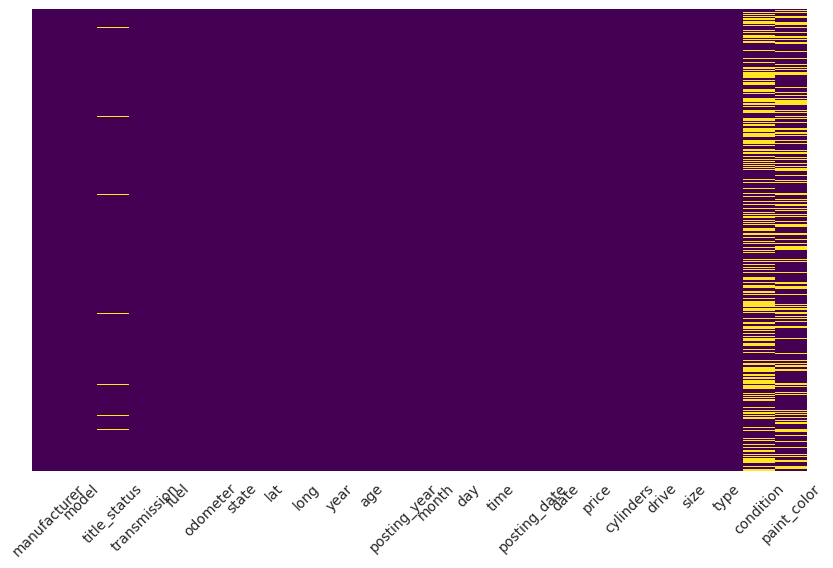

In [98]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis');
plt.xticks(rotation=45)
plt.show()

## Outlier Detection

In [99]:
df_num = df.select_dtypes(include=['int', "float"])
df_num.columns

Index(['odometer', 'lat', 'long', 'year', 'age', 'posting_year', 'month',
       'day', 'price', 'cylinders'],
      dtype='object')

In [100]:
df_obj = df.select_dtypes(include='object')
df_obj.columns

Index(['manufacturer', 'model', 'title_status', 'transmission', 'fuel',
       'state', 'time', 'date', 'drive', 'size', 'type', 'condition',
       'paint_color'],
      dtype='object')

### Numeric Columns

#### Odometer

In [101]:
df["odometer"].describe()

count     277395.00
mean       96238.86
std       188135.88
min            0.00
25%        37753.50
50%        85000.00
75%       133000.00
max     10000000.00
Name: odometer, dtype: float64

In [102]:
df["odometer"].sort_values().tail(30)

1580      9999999.00
27970     9999999.00
232179    9999999.00
27803    10000000.00
106977   10000000.00
253161   10000000.00
167206   10000000.00
107222   10000000.00
106887   10000000.00
139810   10000000.00
8967     10000000.00
378943   10000000.00
260346   10000000.00
105075   10000000.00
185667   10000000.00
42568    10000000.00
401118   10000000.00
380289   10000000.00
78460    10000000.00
311181   10000000.00
106522   10000000.00
375457   10000000.00
102856   10000000.00
104386   10000000.00
146998   10000000.00
102513   10000000.00
147647   10000000.00
33475    10000000.00
145082   10000000.00
22382    10000000.00
Name: odometer, dtype: float64

In [103]:
df[df["odometer"] >= 2000000].sort_values(by="odometer").head(30)

,manufacturer,model,title_status,transmission,fuel,odometer,state,lat,long,year,age,posting_year,month,day,time,posting_date,date,price,cylinders,drive,size,type,condition,paint_color
296820,ford,van,clean,automatic,gas,2000000.00,ok,35.61,-97.46,1992.00,29.00,2021,4,26,20:46:08,2021-04-26 20:46:08-04:00,2021-04-26,3000,8.00,rwd,full-size,van,good,white
318286,pontiac,vibe,clean,automatic,gas,2000695.00,pa,40.48,-78.40,2009.00,12.00,2021,4,30,08:04:53,2021-04-30 08:04:53-04:00,2021-04-30,4500,4.00,4wd,compact,hatchback,excellent,grey
72590,volvo,s60 t5,clean,automatic,gas,2006330.00,co,38.89,-104.74,2006.00,15.00,2021,4,6,12:23:19,2021-04-06 12:23:19-04:00,2021-04-06,4995,5.00,rwd,mid-size,offroad,good,silver
51061,honda,civic,clean,automatic,gas,2009992.00,ca,38.65,-121.44,2002.00,19.00,2021,5,2,18:54:53,2021-05-02 18:54:53-04:00,2021-05-02,2500,4.00,fwd,mid-size,sedan,NaN,green
332785,honda,accord,clean,automatic,gas,2011360.00,ri,41.80,-71.43,2007.00,14.00,2021,4,20,16:10:54,2021-04-20 16:10:54-04:00,2021-04-20,2000,4.00,fwd,mid-size,sedan,good,silver
201605,chevrolet,equinox ls,clean,automatic,gas,2018000.00,mi,44.67,-85.69,2005.00,16.00,2021,4,29,21:04:07,2021-04-29 21:04:07-04:00,2021-04-29,1750,6.00,4wd,mid-size,SUV,good,silver
103402,lexus,rx 330,clean,automatic,gas,2070000.00,fl,28.66,-81.31,2005.00,16.00,2021,4,23,16:07:32,2021-04-23 16:07:32-04:00,2021-04-23,7150,6.00,fwd,mid-size,SUV,excellent,silver
13651,chevrolet,ck 2500,clean,automatic,gas,2076920.00,az,31.57,-111.05,1998.00,23.00,2021,5,3,19:42:38,2021-05-03 19:42:38-04:00,2021-05-03,3500,8.00,rwd,full-size,pickup,fair,white
229063,ford,expedition eddie bauer,clean,automatic,gas,2100002.00,nc,35.07,-78.99,2001.00,20.00,2021,4,21,14:02:55,2021-04-21 14:02:55-04:00,2021-04-21,3500,8.00,4wd,full-size,pickup,NaN,white
147751,ford,focus,clean,automatic,gas,2251212.00,in,39.73,-86.10,2009.00,12.00,2021,4,19,21:23:09,2021-04-19 21:23:09-04:00,2021-04-19,3500,4.00,fwd,mid-size,sedan,excellent,blue


In [104]:
df[df["odometer"] >= 3000000].sort_values(by="odometer").head(15)

,manufacturer,model,title_status,transmission,fuel,odometer,state,lat,long,year,age,posting_year,month,day,time,posting_date,date,price,cylinders,drive,size,type,condition,paint_color
200440,ford,explorer xlt,clean,automatic,gas,3660001.00,mi,42.75,-84.56,2001.00,20.00,2021,4,8,12:12:50,2021-04-08 12:12:50-04:00,2021-04-08,990,6.00,fwd,full-size,SUV,salvage,white
361647,chevrolet,silverado,clean,automatic,gas,4728224.00,tx,31.78,-106.36,2020.00,1.00,2021,4,21,15:15:28,2021-04-21 15:15:28-04:00,2021-04-21,5000,8.00,4wd,full-size,SUV,NaN,NaN
362149,chevrolet,silverado,clean,automatic,gas,4728224.00,tx,31.78,-106.36,2020.00,1.00,2021,4,13,14:28:18,2021-04-13 14:28:18-04:00,2021-04-13,5000,8.00,4wd,full-size,SUV,NaN,NaN
362490,chevrolet,silverado,clean,automatic,gas,4728224.00,tx,31.78,-106.36,2020.00,1.00,2021,4,8,11:50:12,2021-04-08 11:50:12-04:00,2021-04-08,5000,8.00,fwd,full-size,sedan,NaN,NaN
360789,chevrolet,silverado,clean,automatic,gas,4728224.00,tx,31.78,-106.36,2020.00,1.00,2021,5,4,14:16:20,2021-05-04 14:16:20-04:00,2021-05-04,5000,8.00,rwd,full-size,pickup,NaN,NaN
361212,chevrolet,silverado,clean,automatic,gas,4728224.00,tx,31.78,-106.36,2020.00,1.00,2021,4,28,16:50:02,2021-04-28 16:50:02-04:00,2021-04-28,5000,6.00,rwd,full-size,truck,NaN,NaN
361919,chevrolet,silverado,clean,automatic,gas,4728224.00,tx,31.78,-106.36,2020.00,1.00,2021,4,16,16:09:20,2021-04-16 16:09:20-04:00,2021-04-16,5000,8.00,4wd,full-size,SUV,NaN,NaN
362602,chevrolet,silverado,clean,automatic,gas,4728224.00,tx,31.78,-106.36,2020.00,1.00,2021,4,6,15:00:06,2021-04-06 15:00:06-04:00,2021-04-06,5000,6.00,fwd,full-size,mini-van,NaN,NaN
121118,volkswagen,dune buggy,clean,manual,gas,5000000.00,ga,32.74,-84.88,1967.00,54.00,2021,4,11,08:14:55,2021-04-11 08:14:55-04:00,2021-04-11,12500,4.00,rwd,mid-size,sedan,excellent,blue
188707,buick,enclave,clean,automatic,gas,5545555.00,mi,42.30,-85.13,2012.00,9.00,2021,5,4,13:45:15,2021-05-04 13:45:15-04:00,2021-05-04,1,6.00,rwd,full-size,coupe,NaN,NaN


In [105]:
df[df["odometer"] >= 5000000].sort_values(by="odometer")

,manufacturer,model,title_status,transmission,fuel,odometer,state,lat,long,year,age,posting_year,month,day,time,posting_date,date,price,cylinders,drive,size,type,condition,paint_color
121118,volkswagen,dune buggy,clean,manual,gas,5000000.00,ga,32.74,-84.88,1967.00,54.00,2021,4,11,08:14:55,2021-04-11 08:14:55-04:00,2021-04-11,12500,4.00,rwd,mid-size,sedan,excellent,blue
188707,buick,enclave,clean,automatic,gas,5545555.00,mi,42.30,-85.13,2012.00,9.00,2021,5,4,13:45:15,2021-05-04 13:45:15-04:00,2021-05-04,1,6.00,rwd,full-size,coupe,NaN,NaN
188739,buick,enclave,clean,automatic,gas,5545555.00,mi,42.30,-85.13,2012.00,9.00,2021,5,1,12:46:43,2021-05-01 12:46:43-04:00,2021-05-01,1,4.00,4wd,compact,SUV,NaN,NaN
362527,chevrolet,malibu,salvage,automatic,gas,5555555.00,tx,31.84,-106.54,1992.00,29.00,2021,4,7,15:53:57,2021-04-07 15:53:57-04:00,2021-04-07,3500,10.00,4wd,full-size,SUV,NaN,NaN
198042,buick,enclave,clean,automatic,gas,5555555.00,mi,42.30,-85.13,2012.00,9.00,2021,5,4,13:46:04,2021-05-04 13:46:04-04:00,2021-05-04,1,6.00,rwd,full-size,coupe,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260346,volvo,240 dl,clean,automatic,gas,10000000.00,ny,42.18,-74.55,1981.00,40.00,2021,4,24,16:56:32,2021-04-24 16:56:32-04:00,2021-04-24,1,4.00,rwd,full-size,SUV,salvage,NaN
33475,chevrolet,impala,clean,manual,gas,10000000.00,ca,33.97,-118.25,1962.00,59.00,2021,5,2,18:38:59,2021-05-02 18:38:59-04:00,2021-05-02,13,8.00,rwd,full-size,coupe,NaN,black
147647,ford,100,clean,automatic,gas,10000000.00,in,38.74,-85.52,1954.00,67.00,2021,4,21,12:49:47,2021-04-21 12:49:47-04:00,2021-04-21,3500,4.00,fwd,compact,SUV,good,red
106887,ford,f-150,clean,automatic,gas,10000000.00,fl,27.37,-82.53,2000.00,21.00,2021,4,13,07:50:11,2021-04-13 07:50:11-04:00,2021-04-13,450,6.00,4wd,full-size,SUV,NaN,NaN


In [106]:
plot_odo = df[df['odometer'] < 250000]["odometer"]

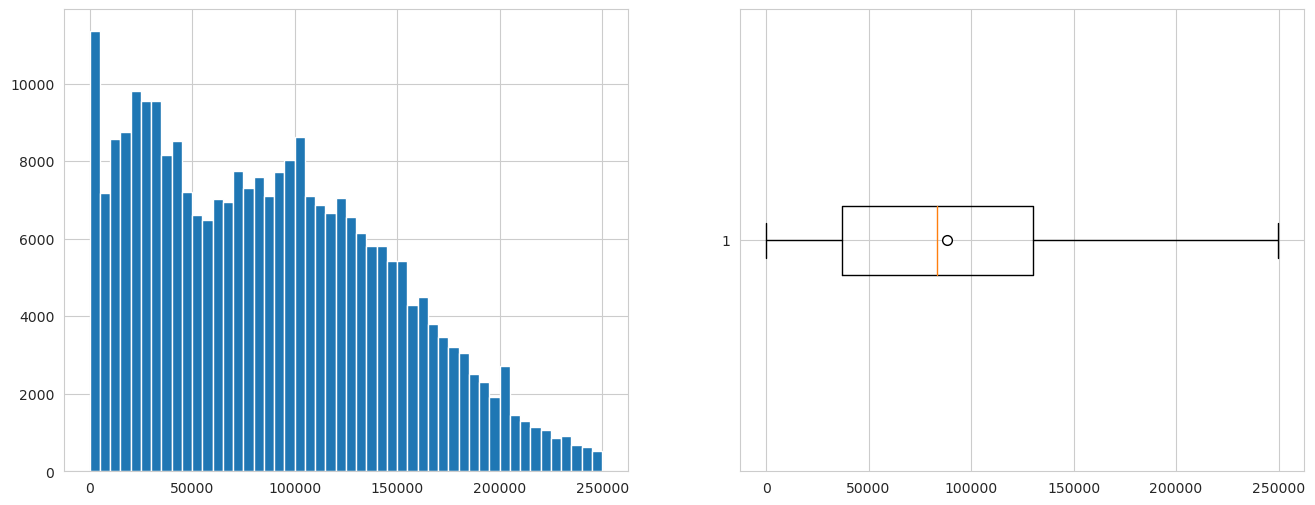

In [107]:
plt.figure(figsize=(16, 6))

plt.subplot(121)
plt.hist(plot_odo, bins=50)

plt.subplot(122)
plt.boxplot(plot_odo,
            vert=False,
            whis=2.5,
            showmeans=True,
#             showfliers=False,
            meanprops={
                "marker": "o",
                "markerfacecolor": "white",
                "markeredgecolor": "black",
                "markersize": "7"
            })

plt.show()

In [108]:
plot_odoX = df[df['odometer'] > 250000]["odometer"]

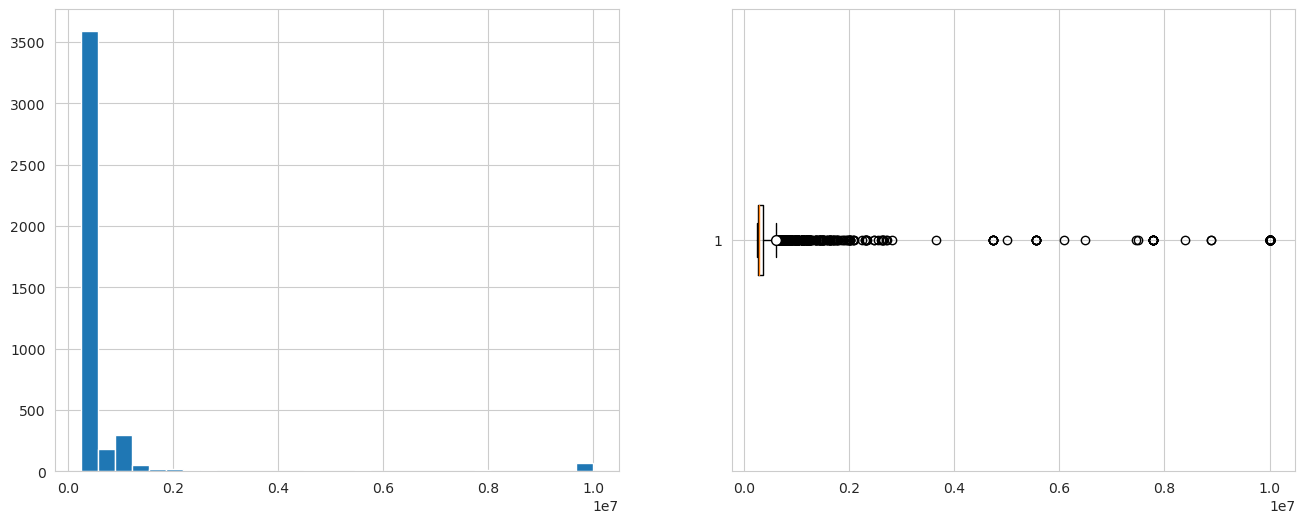

In [109]:
plt.figure(figsize=(16, 6))

plt.subplot(121)
plt.hist(plot_odoX, bins=30)

plt.subplot(122)
plt.boxplot(plot_odoX,
            vert=False,
            whis=2.5,
            showmeans=True,
#             showfliers=False,
            meanprops={
                "marker": "o",
                "markerfacecolor": "white",
                "markeredgecolor": "black",
                "markersize": "7"
            })

plt.show()

In [110]:
plot_odoX2 = df[df['odometer'] > 1000000]["odometer"]

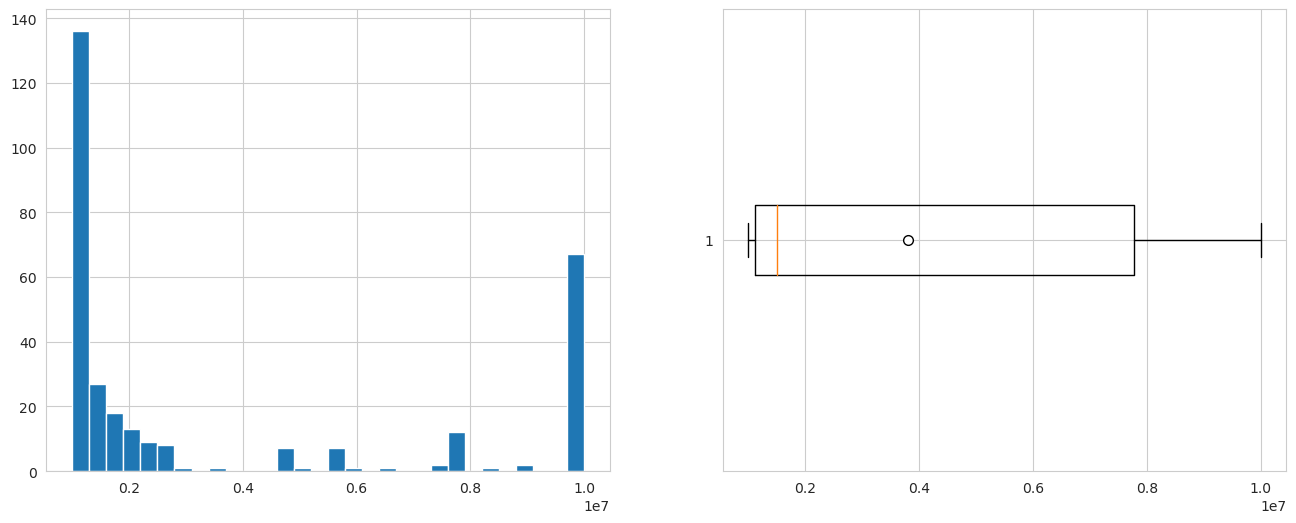

In [111]:
plt.figure(figsize=(16, 6))

plt.subplot(121)
plt.hist(plot_odoX2, bins=30)

plt.subplot(122)
plt.boxplot(plot_odoX2,
            vert=False,
            whis=2.5,
            showmeans=True,
#             showfliers=False,
            meanprops={
                "marker": "o",
                "markerfacecolor": "white",
                "markeredgecolor": "black",
                "markersize": "7"
            })

plt.show()

In [112]:
df.drop(df[df['odometer'] > 1000000].index, axis=0, inplace=True)

#### Year

In [113]:
df["year"].describe()

count   277081.00
mean      2011.67
std          8.53
min       1900.00
25%       2009.00
50%       2014.00
75%       2017.00
max       2022.00
Name: year, dtype: float64

In [114]:
df["year"].value_counts(dropna=False)

2018.00    24328
2017.00    24318
2015.00    20679
2013.00    20391
2016.00    20142
           ...  
1901.00        1
1915.00        1
1905.00        1
1925.00        1
1943.00        1
Name: year, Length: 102, dtype: int64

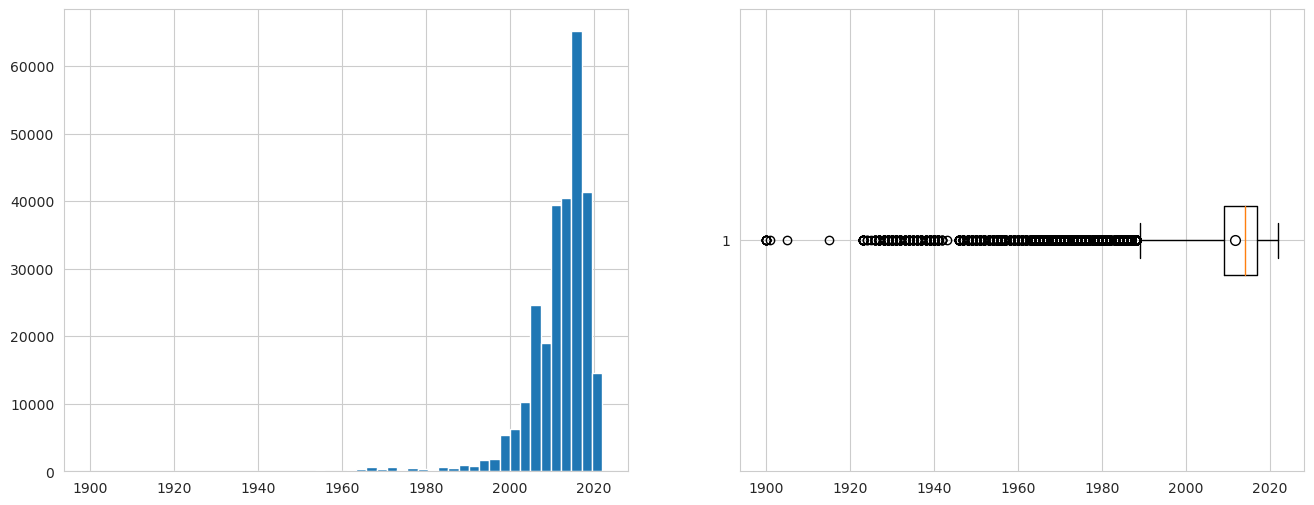

In [115]:
plt.figure(figsize=(16, 6))

plt.subplot(121)
plt.hist(df["year"], bins=50)

plt.subplot(122)
plt.boxplot(df["year"],
            vert=False,
            whis=2.5,
            showmeans=True,
#             showfliers=False,
            meanprops={
                "marker": "o",
                "markerfacecolor": "white",
                "markeredgecolor": "black",
                "markersize": "7"
            })

plt.show()

In [116]:
plot_year = df[df['year'] > 1980]["year"]

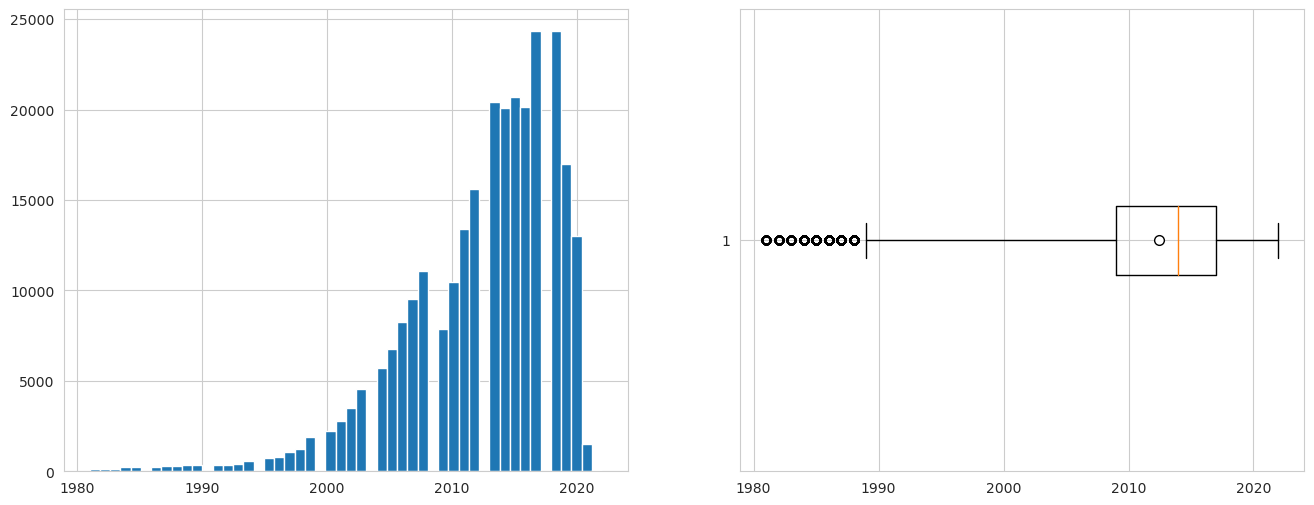

In [117]:
plt.figure(figsize=(16, 6))

plt.subplot(121)
plt.hist(plot_year, bins=50)

plt.subplot(122)
plt.boxplot(plot_year,
            vert=False,
            whis=2.5,
            showmeans=True,
#             showfliers=False,
            meanprops={
                "marker": "o",
                "markerfacecolor": "white",
                "markeredgecolor": "black",
                "markersize": "7"
            })

plt.show()

In [118]:
plot_yearX = df[df['year'] < 1995]["year"]

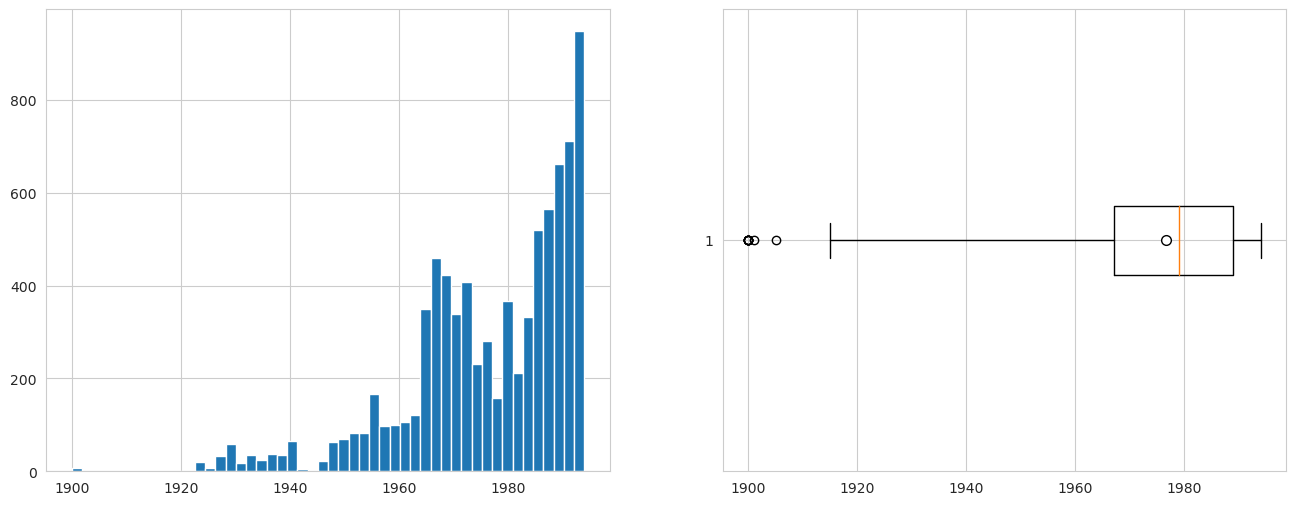

In [119]:
plt.figure(figsize=(16, 6))

plt.subplot(121)
plt.hist(plot_yearX, bins=50)

plt.subplot(122)
plt.boxplot(plot_yearX,
            vert=False,
            whis=2.5,
            showmeans=True,
#             showfliers=False,
            meanprops={
                "marker": "o",
                "markerfacecolor": "white",
                "markeredgecolor": "black",
                "markersize": "7"
            })

plt.show()

In [120]:
df[df['year'] < 1945]

,manufacturer,model,title_status,transmission,fuel,odometer,state,lat,long,year,age,posting_year,month,day,time,posting_date,date,price,cylinders,drive,size,type,condition,paint_color
384519,chevrolet,business coupe,clean,automatic,gas,500.00,va,37.51,-77.56,1939.00,82.00,2021,5,1,06:18:03,2021-05-01 06:18:03-04:00,2021-05-01,29995,8.00,rwd,mid-size,coupe,good,blue
327596,pontiac,sedan,clean,manual,gas,50000.00,pa,41.31,-79.05,1936.00,85.00,2021,4,18,09:10:26,2021-04-18 09:10:26-04:00,2021-04-18,11000,6.00,rwd,full-size,sedan,good,custom
130326,chevrolet,pickup,clean,manual,gas,0.00,id,46.52,-116.39,1941.00,80.00,2021,4,23,21:10:50,2021-04-23 21:10:50-04:00,2021-04-23,14000,4.00,fwd,compact,convertible,excellent,black
217904,ford,model t,clean,manual,gas,12345.00,mt,45.63,-109.26,1915.00,106.00,2021,4,18,14:20:03,2021-04-18 14:20:03-04:00,2021-04-18,5000,4.00,rwd,mid-size,sedan,good,NaN
344283,ford,t bucket,clean,automatic,gas,13295.00,tn,35.87,-83.75,1923.00,98.00,2021,4,29,13:37:45,2021-04-29 13:37:45-04:00,2021-04-29,17000,8.00,rwd,full-size,convertible,excellent,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253880,ford,truck,missing,manual,gas,888888.00,nm,35.08,-106.65,1928.00,93.00,2021,4,21,21:27:41,2021-04-21 21:27:41-04:00,2021-04-21,4500,6.00,4wd,full-size,sedan,good,NaN
305023,ford,model a,clean,automatic,gas,1233.00,or,44.63,-123.06,1928.00,93.00,2021,4,28,20:03:18,2021-04-28 20:03:18-04:00,2021-04-28,15000,4.00,rwd,mid-size,sedan,NaN,NaN
46776,chevrolet,master deluxe,clean,manual,gas,12700.00,ca,39.23,-119.59,1942.00,79.00,2021,5,3,17:38:24,2021-05-03 17:38:24-04:00,2021-05-03,28000,6.00,rwd,full-size,coupe,excellent,blue
256287,chevrolet,sedan,clean,manual,gas,6000.00,ny,42.88,-73.99,1934.00,87.00,2021,4,26,09:43:52,2021-04-26 09:43:52-04:00,2021-04-26,27000,8.00,rwd,full-size,sedan,excellent,black


In [121]:
df.drop(df[df['year'] < 1945].index, axis=0, inplace=True)

#### Age

In [122]:
df["age"].describe()

count   276734.00
mean         9.23
std          8.06
min         -1.00
25%          4.00
50%          7.00
75%         12.00
max         75.00
Name: age, dtype: float64

In [123]:
df["age"].value_counts(dropna=False)

3.00     24328
4.00     24318
6.00     20679
8.00     20391
5.00     20142
         ...  
73.00       32
72.00       31
74.00       31
63.00       25
75.00       22
Name: age, Length: 77, dtype: int64

In [124]:
df[df["age"] < 0]

,manufacturer,model,title_status,transmission,fuel,odometer,state,lat,long,year,age,posting_year,month,day,time,posting_date,date,price,cylinders,drive,size,type,condition,paint_color
90686,ford,Isuzu NPR HD,clean,automatic,diesel,10.00,fl,26.28,-81.76,2022.00,-1.00,2021,5,4,12:08:39,2021-05-04 12:08:39-04:00,2021-05-04,0,4.00,rwd,full-size,truck,new,white
399985,mitsubishi,eclipse cross sel,NaN,automatic,gas,5.00,wa,47.72,-117.41,2022.00,-1.00,2021,4,4,18:02:54,2021-04-04 18:02:54-04:00,2021-04-04,431,4.00,4wd,mid-size,SUV,excellent,NaN
327539,chevrolet,All,salvage,automatic,diesel,400.00,pa,40.47,-80.09,2022.00,-1.00,2021,4,18,23:57:30,2021-04-18 23:57:30-04:00,2021-04-18,400,4.00,fwd,compact,sedan,NaN,NaN
392198,mitsubishi,eclipse cross es,clean,automatic,gas,9.00,wa,45.39,-122.61,2022.00,-1.00,2021,4,22,10:09:33,2021-04-22 10:09:33-04:00,2021-04-22,0,4.00,4wd,mid-size,SUV,NaN,NaN
88471,ford,Any make any model,clean,automatic,gas,364747.00,de,39.57,-75.60,2022.00,-1.00,2021,4,19,09:55:42,2021-04-19 09:55:42-04:00,2021-04-19,1000000,8.00,4wd,full-size,truck,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148754,mercury,Cars/trucks/suvs,clean,automatic,gas,2021.00,in,39.71,-86.02,2022.00,-1.00,2021,4,4,11:40:31,2021-04-04 11:40:31-04:00,2021-04-04,500,4.00,fwd,mid-size,SUV,NaN,NaN
399009,mitsubishi,eclipse cross le,NaN,automatic,gas,5.00,wa,47.72,-117.41,2022.00,-1.00,2021,5,1,19:06:10,2021-05-01 19:06:10-04:00,2021-05-01,384,4.00,4wd,full-size,SUV,excellent,NaN
392117,mitsubishi,eclipse cross le,clean,automatic,gas,9.00,wa,45.39,-122.61,2022.00,-1.00,2021,4,22,13:51:28,2021-04-22 13:51:28-04:00,2021-04-22,0,4.00,fwd,full-size,SUV,NaN,NaN
394323,mitsubishi,eclipse cross se,NaN,automatic,gas,6.00,wa,47.72,-117.41,2022.00,-1.00,2021,4,8,16:33:07,2021-04-08 16:33:07-04:00,2021-04-08,415,4.00,4wd,mid-size,SUV,excellent,NaN


In [125]:
df.drop(df[df["age"] < 0].index, axis=0, inplace=True)

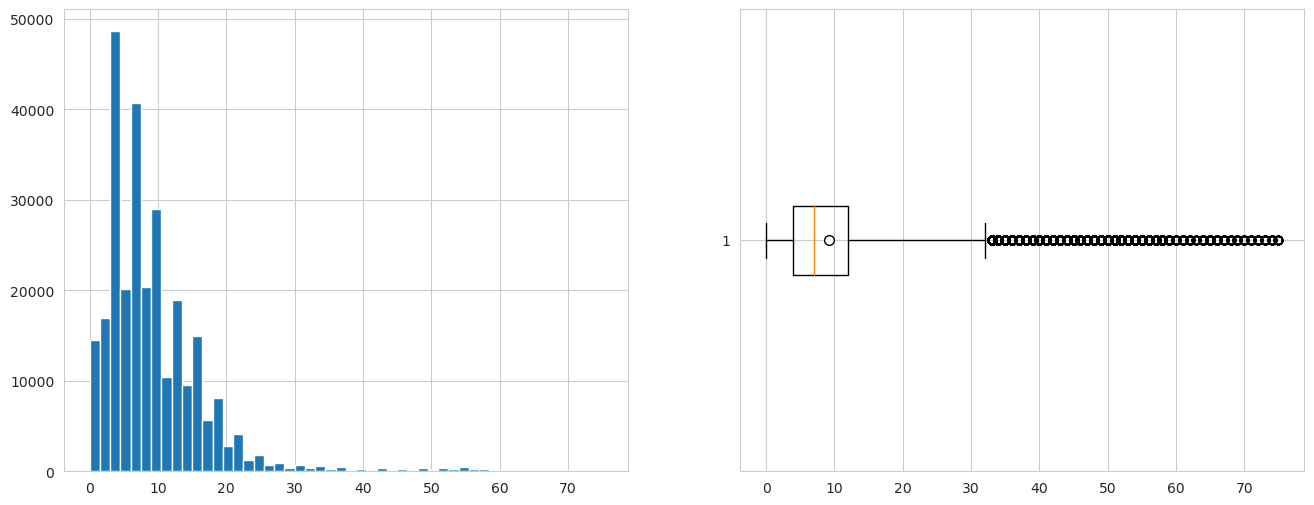

In [126]:
plt.figure(figsize=(16, 6))

plt.subplot(121)
plt.hist(df['age'], bins=50)

plt.subplot(122)
plt.boxplot(df['age'],
            vert=False,
            whis=2.5,
            showmeans=True,
#             showfliers=False,
            meanprops={
                "marker": "o",
                "markerfacecolor": "white",
                "markeredgecolor": "black",
                "markersize": "7"
            })

plt.show()

In [127]:
plot_ageX = df[df['age'] > 35]["age"]

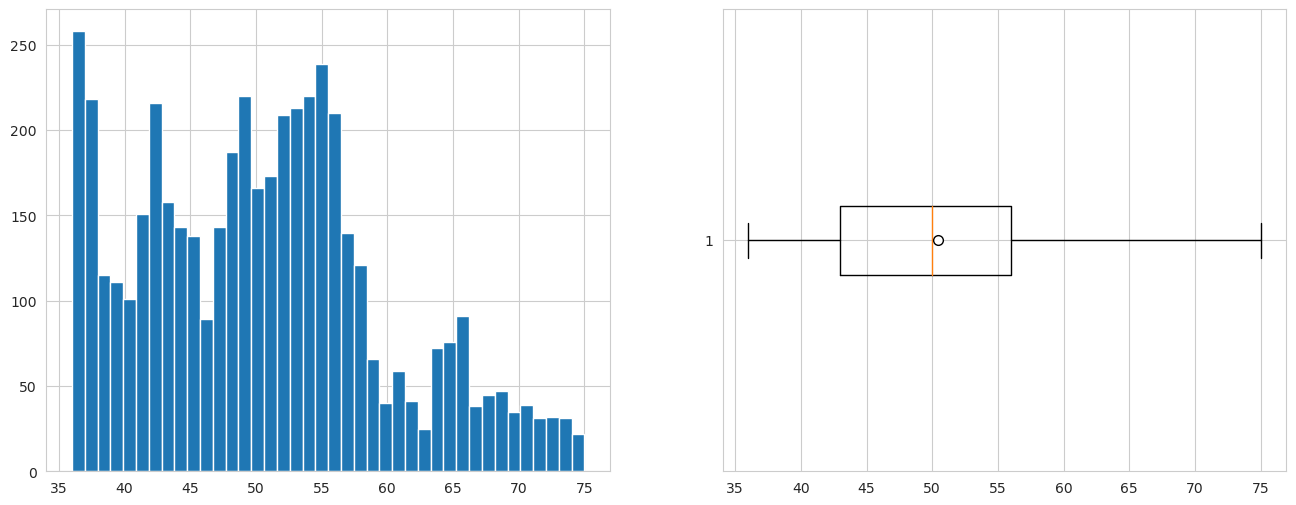

In [128]:
plt.figure(figsize=(16, 6))

plt.subplot(121)
plt.hist(plot_ageX, bins=40)

plt.subplot(122)
plt.boxplot(plot_ageX,
            vert=False,
            whis=2.5,
            showmeans=True,
#             showfliers=False,
            meanprops={
                "marker": "o",
                "markerfacecolor": "white",
                "markeredgecolor": "black",
                "markersize": "7"
            })

plt.show()

In [129]:
df[df['age'] > 56]

,manufacturer,model,title_status,transmission,fuel,odometer,state,lat,long,year,age,posting_year,month,day,time,posting_date,date,price,cylinders,drive,size,type,condition,paint_color
239980,ford,thunderbird,clean,automatic,gas,65503.00,nv,36.06,-115.02,1957.00,64.00,2021,4,30,20:36:01,2021-04-30 20:36:01-04:00,2021-04-30,59980,4.00,fwd,mid-size,SUV,NaN,custom
97741,ford,customline,clean,automatic,gas,999.00,fl,27.08,-82.44,1953.00,68.00,2021,4,22,12:55:13,2021-04-22 12:55:13-04:00,2021-04-22,13500,8.00,rwd,full-size,sedan,excellent,red
89831,gmc,truck,clean,automatic,gas,150.00,fl,28.97,-81.03,1949.00,72.00,2021,4,16,15:48:16,2021-04-16 15:48:16-04:00,2021-04-16,18000,8.00,rwd,full-size,truck,good,black
287241,ford,deluxe,clean,automatic,gas,99999.00,oh,38.39,-78.99,1951.00,70.00,2021,4,30,04:38:26,2021-04-30 04:38:26-04:00,2021-04-30,5950,1.00,rwd,full-size,convertible,good,grey
209404,cadillac,convertible,clean,automatic,gas,44000.00,mn,45.28,-93.42,1962.00,59.00,2021,5,1,19:25:09,2021-05-01 19:25:09-04:00,2021-05-01,15900,8.00,rwd,full-size,convertible,excellent,blue
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239209,chevrolet,coupe,clean,automatic,gas,12345.00,nv,38.89,-104.74,1950.00,71.00,2021,5,3,19:19:51,2021-05-03 19:19:51-04:00,2021-05-03,22000,8.00,rwd,mid-size,sedan,like new,yellow
321397,chevrolet,corvette convertible,clean,manual,gas,1.00,pa,40.60,-75.52,1957.00,64.00,2021,4,30,17:20:30,2021-04-30 17:20:30-04:00,2021-04-30,1,8.00,rwd,mid-size,convertible,good,NaN
140192,buick,riviera,clean,automatic,gas,85000.00,il,16.35,51.59,1952.00,69.00,2021,4,23,07:02:17,2021-04-23 07:02:17-04:00,2021-04-23,5000,8.00,rwd,full-size,truck,NaN,NaN
298164,mercury,comet,clean,automatic,gas,100000.00,ok,36.00,-91.58,1963.00,58.00,2021,4,15,23:29:14,2021-04-15 23:29:14-04:00,2021-04-15,900,4.00,fwd,mid-size,sedan,NaN,NaN


In [130]:
df.drop(df[df['age'] > 56].index, axis=0, inplace=True)

#### Posting Year, Month, Day

In [131]:
df["posting_year"].describe()

count   275608.00
mean      2021.00
std          0.00
min       2021.00
25%       2021.00
50%       2021.00
75%       2021.00
max       2021.00
Name: posting_year, dtype: float64

In [132]:
df["month"].describe()

count   275608.00
mean         4.25
std          0.44
min          4.00
25%          4.00
50%          4.00
75%          5.00
max          5.00
Name: month, dtype: float64

In [133]:
df["day"].describe()

count   275608.00
mean        15.58
std         10.08
min          1.00
25%          4.00
50%         16.00
75%         25.00
max         30.00
Name: day, dtype: float64

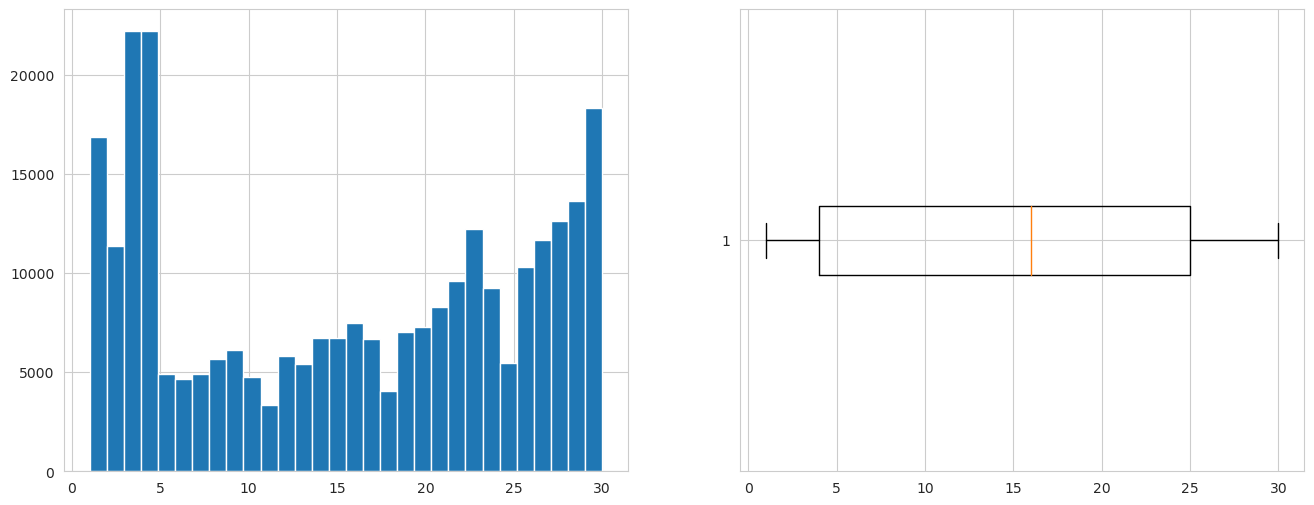

In [134]:
plt.figure(figsize=(16, 6))

plt.subplot(121)
plt.hist(df["day"], bins=30)

plt.subplot(122)
plt.boxplot(df["day"],
            vert=False,
            whis=1.5)

plt.show()

#### Price

In [135]:
df["price"].describe()

count       275608.00
mean         53302.84
std        9837753.35
min              0.00
25%           5995.00
50%          13995.00
75%          26777.00
max     3736928711.00
Name: price, dtype: float64

In [136]:
df["price"].sort_values().tail(30)

170473        299991
360175        299991
387871        304995
42674         347999
43703         349999
318513        400123
145152        566567
76292         655000
298653        777777
226454       1000000
226110       1000000
227011       1000000
346477       1111111
207698       1111111
212916       1111111
150640       1234567
188287       1234567
318290       3226714
275646       5000000
291723      10004000
343221      11111111
132081      17000000
368078      25003000
187737     123456789
298628     123456789
133346     123456789
148332    1234567890
178903    1410065407
88443     3024942282
346240    3736928711
Name: price, dtype: int64

In [137]:
plot_price = df[df['price'] < 50000]["price"]

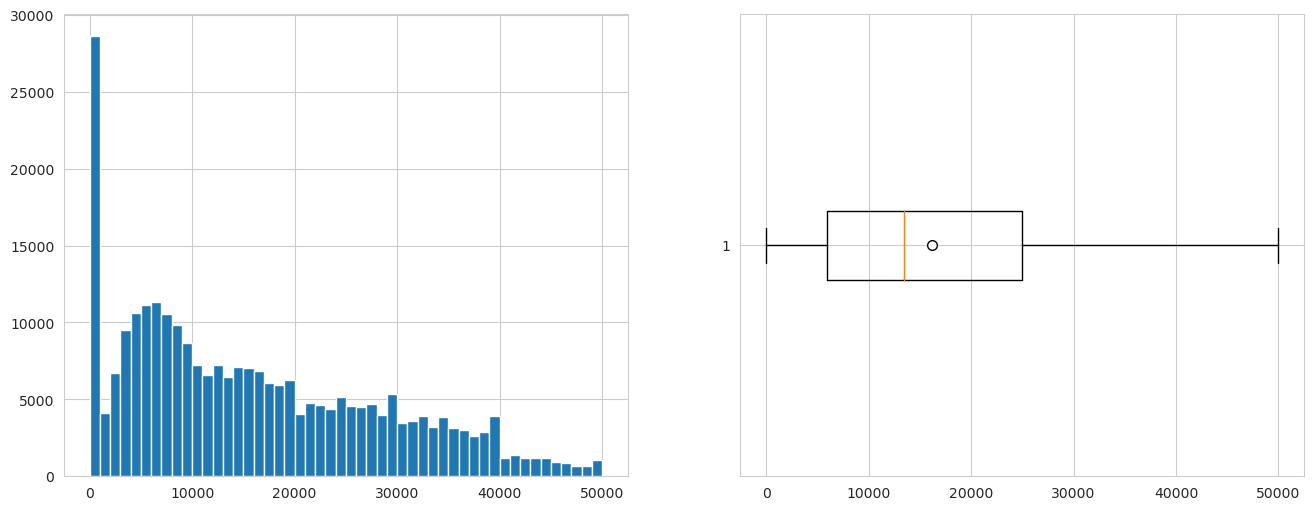

In [138]:
plt.figure(figsize=(16, 6))

plt.subplot(121)
plt.hist(plot_price, bins=50)

plt.subplot(122)
plt.boxplot(plot_price,
            vert=False,
            whis=2.5,
            showmeans=True,
#             showfliers=False,
            meanprops={
                "marker": "o",
                "markerfacecolor": "white",
                "markeredgecolor": "black",
                "markersize": "7"
            })

plt.show()

In [139]:
df[df['price'] > 90000]

,manufacturer,model,title_status,transmission,fuel,odometer,state,lat,long,year,age,posting_year,month,day,time,posting_date,date,price,cylinders,drive,size,type,condition,paint_color
390044,ferrari,360 modena spyder,clean,automatic,gas,34123.00,wa,48.75,-122.47,2004.00,17.00,2021,4,13,12:06:31,2021-04-13 12:06:31-04:00,2021-04-13,116899,8.00,rwd,mid-size,convertible,good,red
241273,nissan,plymouth barracuda,clean,manual,gas,77000.00,nv,33.68,-117.91,1970.00,51.00,2021,4,26,17:00:20,2021-04-26 17:00:20-04:00,2021-04-26,179888,8.00,rwd,full-size,sedan,excellent,green
353914,chrysler,Mclaren 570GT W/ Upgrades,clean,automatic,gas,13000.00,tx,32.79,-96.80,2017.00,4.00,2021,4,30,10:22:23,2021-04-30 10:22:23-04:00,2021-04-30,139950,8.00,rwd,mid-size,coupe,NaN,NaN
194442,tesla,model s,clean,automatic,electric,18835.00,mi,42.45,-85.67,2018.00,3.00,2021,5,1,10:42:04,2021-05-01 10:42:04-04:00,2021-05-01,104990,1.00,fwd,full-size,sedan,NaN,red
297783,audi,r8,clean,manual,gas,23229.00,ok,32.96,-96.92,2009.00,12.00,2021,4,20,10:51:26,2021-04-20 10:51:26-04:00,2021-04-20,99991,8.00,4wd,compact,coupe,NaN,grey
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40102,mercedes-benz,sprinter,clean,automatic,diesel,64000.00,ca,33.70,-117.76,2018.00,3.00,2021,5,2,19:55:02,2021-05-02 19:55:02-04:00,2021-05-02,120000,6.00,4wd,mid-size,van,good,white
252966,rover,defender 110,clean,manual,gas,750.00,nm,33.47,-111.92,1993.00,28.00,2021,4,26,16:03:20,2021-04-26 16:03:20-04:00,2021-04-26,129888,8.00,4wd,full-size,SUV,NaN,black
156678,chevrolet,corvette,clean,automatic,gas,0.00,ia,41.13,-96.25,2020.00,1.00,2021,4,24,09:54:57,2021-04-24 09:54:57-04:00,2021-04-24,109988,8.00,rwd,full-size,truck,NaN,NaN
317627,ford,mustang,clean,automatic,gas,472.00,or,45.40,-122.62,2020.00,1.00,2021,4,19,16:00:44,2021-04-19 16:00:44-04:00,2021-04-19,90781,8.00,4wd,sub-compact,van,NaN,white


In [140]:
plot_priceX = df[(df['price'] > 90000) & (df['price'] < 350000)]["price"]

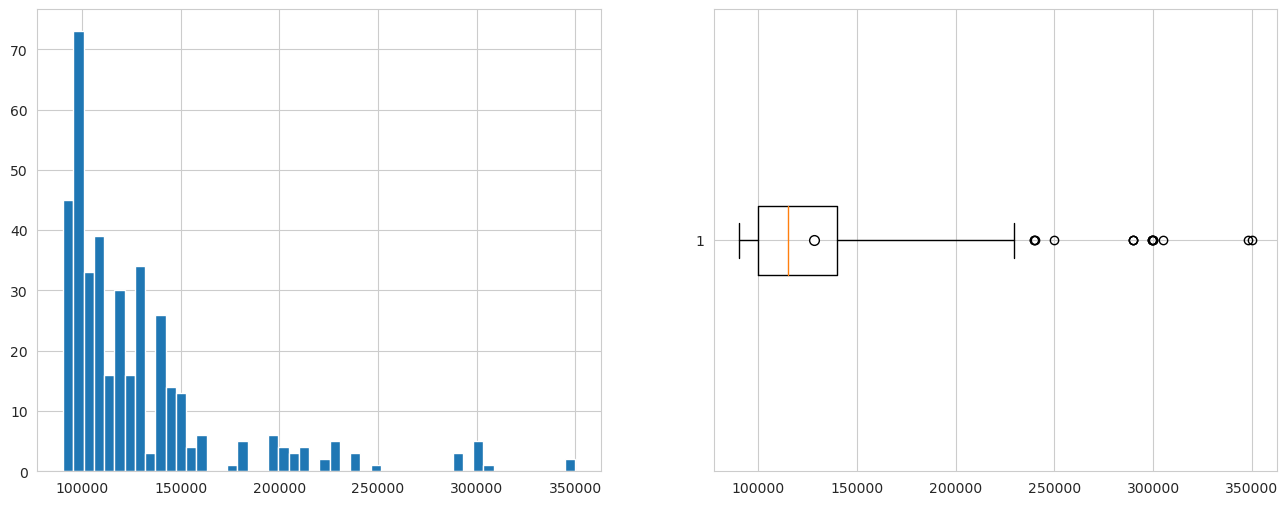

In [141]:
plt.figure(figsize=(16, 6))

plt.subplot(121)
plt.hist(plot_priceX, bins=50)

plt.subplot(122)
plt.boxplot(plot_priceX,
            vert=False,
            whis=2.5,
            showmeans=True,
#             showfliers=False,
            meanprops={
                "marker": "o",
                "markerfacecolor": "white",
                "markeredgecolor": "black",
                "markersize": "7"
            })

plt.show()

In [142]:
df.drop(df[df['price'] > 90000].index, axis=0, inplace=True)

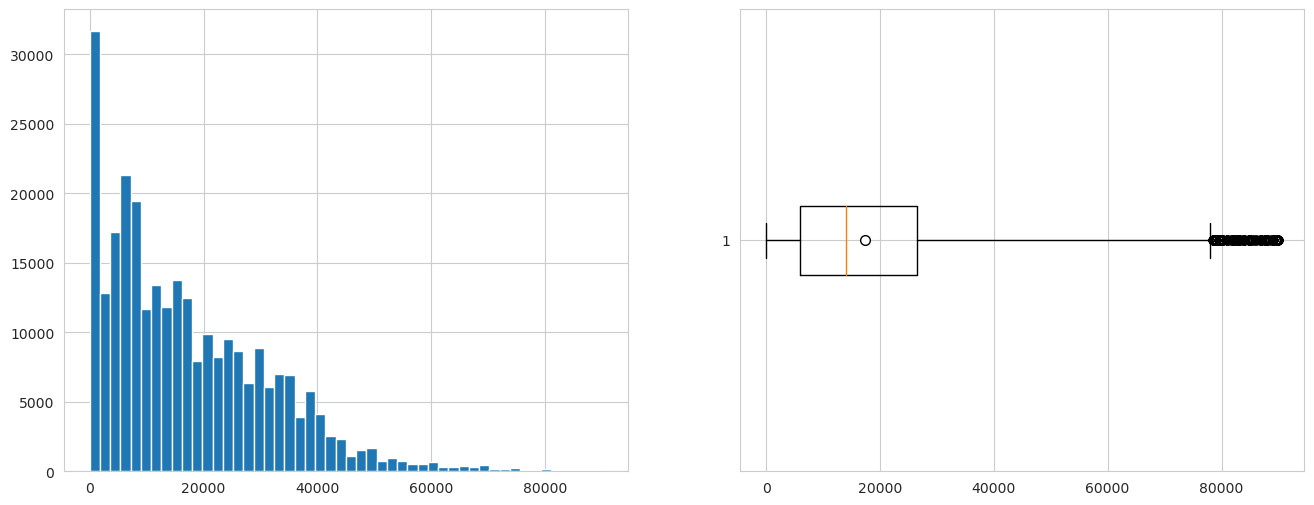

In [143]:
plt.figure(figsize=(16, 6))

plt.subplot(121)
plt.hist(df['price'], bins=50)

plt.subplot(122)
plt.boxplot(df['price'],
            vert=False,
            whis=2.5,
            showmeans=True,
#             showfliers=False,
            meanprops={
                "marker": "o",
                "markerfacecolor": "white",
                "markeredgecolor": "black",
                "markersize": "7"
            })

plt.show()

#### Cylinders

In [144]:
df["cylinders"].describe()

count   275186.00
mean         5.86
std          1.68
min          1.00
25%          4.00
50%          6.00
75%          8.00
max         12.00
Name: cylinders, dtype: float64

In [145]:
df["cylinders"].value_counts(dropna=False)

6.00     104497
4.00      88607
8.00      74075
1.00       3074
10.00      2064
5.00       1853
3.00        686
12.00       330
Name: cylinders, dtype: int64

In [146]:
corr = df[['odometer', 'year', 'age', 'month', 'day', 'price', 'cylinders']].corr()

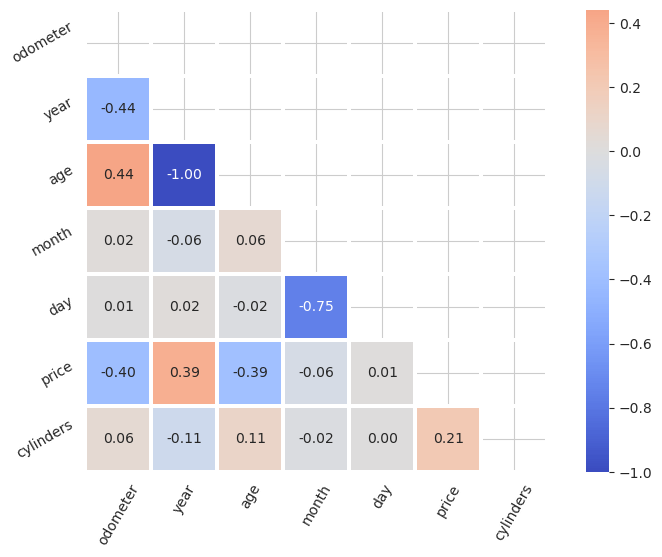

In [147]:
mask = np.triu(np.ones_like(corr, dtype=bool))

sns.heatmap(corr, mask=mask, cmap='coolwarm', ax=None, linewidths=1.5, center=0, annot=True,
            fmt='.2f', square=True, xticklabels=(corr.index), yticklabels=(corr.columns))

plt.xticks(rotation=60)
plt.yticks(rotation=30)
plt.grid('off')
plt.show()

In [148]:
df.drop(["posting_year", "month", "day", "date"], axis=1, inplace=True)

In [149]:
df.sort_values(by="posting_date", inplace=True)

In [150]:
df.reset_index(inplace=True)

In [151]:
df

,index,manufacturer,model,title_status,transmission,fuel,odometer,state,lat,long,year,age,time,posting_date,price,cylinders,drive,size,type,condition,paint_color
0,263405,dodge,durango,clean,automatic,gas,96475.00,ny,42.60,-73.71,2013.00,8.00,03:00:25,2021-04-04 03:00:25-04:00,18997,6.00,rwd,full-size,sedan,excellent,black
1,406887,dodge,dart,NaN,automatic,gas,71800.00,wi,42.60,-87.88,2013.00,8.00,03:03:15,2021-04-04 03:03:15-04:00,119,4.00,fwd,mid-size,sedan,excellent,NaN
2,386356,ford,FordE350,clean,automatic,gas,40000.00,va,33.82,-84.35,2011.00,10.00,03:08:37,2021-04-04 03:08:37-04:00,18937,8.00,fwd,compact,sedan,NaN,NaN
3,79914,toyota,sienna,clean,automatic,gas,128356.00,co,39.67,-105.00,2012.00,9.00,03:10:23,2021-04-04 03:10:23-04:00,24900,6.00,fwd,mid-size,van,NaN,silver
4,238728,toyota,sienna,clean,automatic,gas,128356.00,ne,39.67,-105.00,2012.00,9.00,03:10:34,2021-04-04 03:10:34-04:00,24900,6.00,fwd,full-size,van,NaN,silver
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275181,395186,ford,escape sel fwd gas suv auto,clean,automatic,gas,29657.00,wa,47.20,-122.30,2019.00,2.00,23:56:13,2021-05-04 23:56:13-04:00,19499,6.00,rwd,full-size,SUV,NaN,grey
275182,395185,chevrolet,silverado,clean,automatic,gas,129300.00,wa,47.89,-122.20,2003.00,18.00,23:56:25,2021-05-04 23:56:25-04:00,25500,8.00,4wd,full-size,pickup,excellent,black
275183,395183,acura,integra,clean,manual,gas,156000.00,wa,47.99,-122.20,1999.00,22.00,23:58:48,2021-05-04 23:58:48-04:00,5500,4.00,fwd,compact,hatchback,excellent,red
275184,395182,chevrolet,c10,clean,automatic,gas,35000.00,wa,47.69,-122.38,1983.00,38.00,23:59:22,2021-05-04 23:59:22-04:00,16000,8.00,rwd,full-size,truck,good,blue


#### Latitude and Longitude

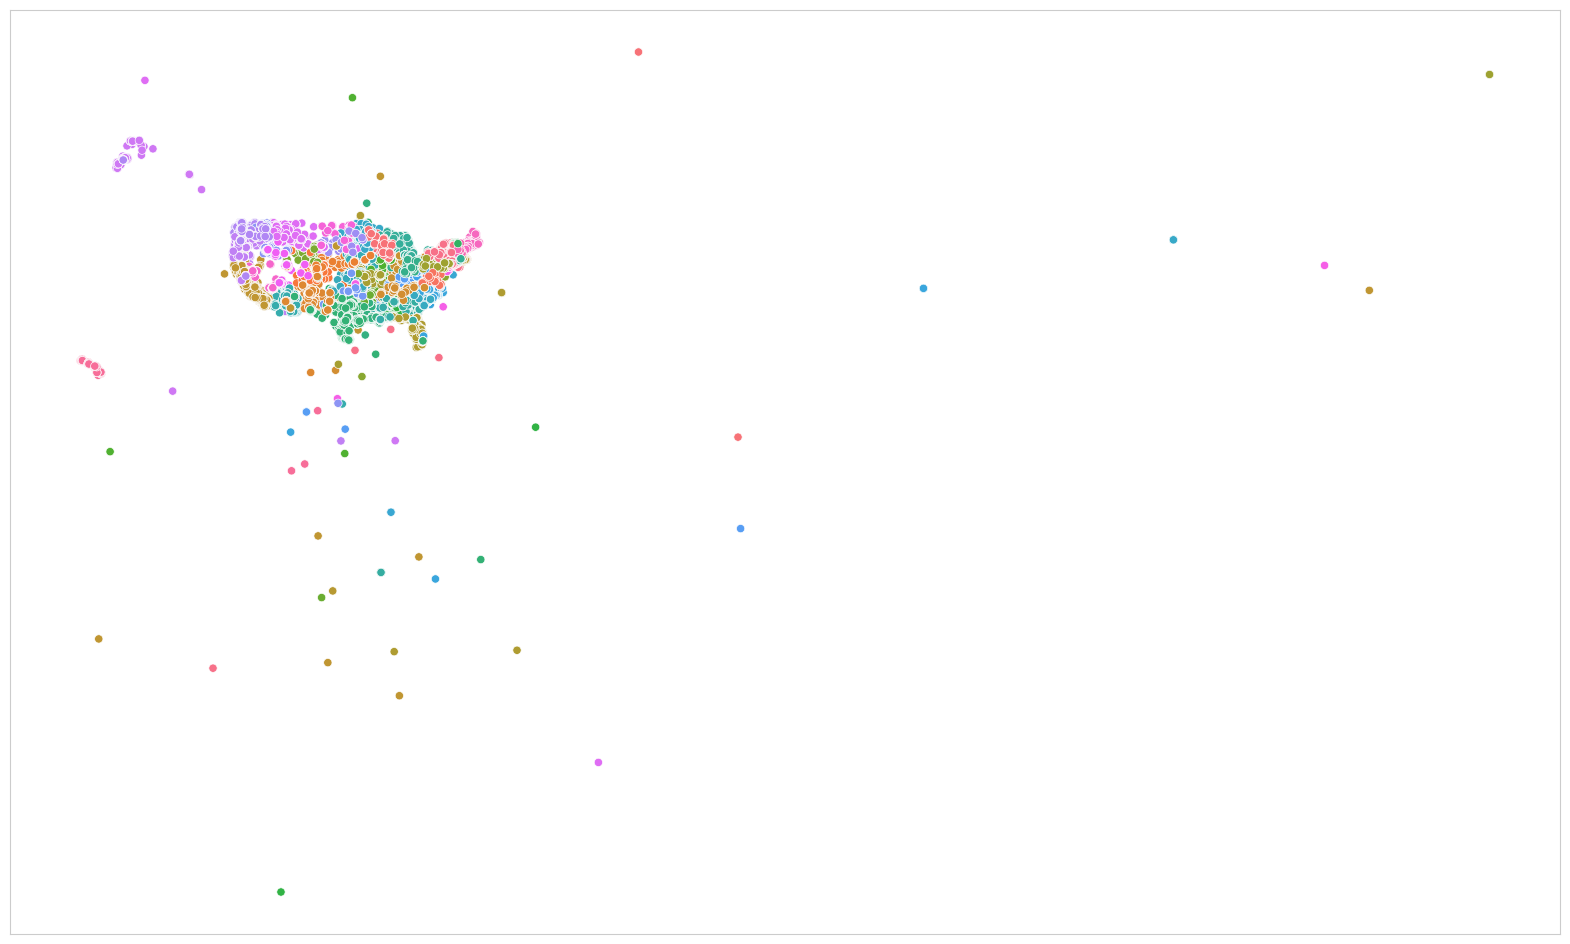

In [152]:
plt.figure(figsize=(20, 12))
sns.scatterplot(x='long', y='lat', data=df, hue="state", legend=False);
plt.xlabel("")
plt.xticks([])
plt.ylabel("")
plt.yticks([])
plt.show()

In [153]:
import folium
import branca.colormap as cm

In [154]:
data = pd.DataFrame(df.groupby(["state", "lat", "long"])["index"].count())
data = data.reset_index()
data.columns = ["state", "lat", "long", "cnt"]

In [155]:
data = data.sort_values(by="cnt", ascending=False)

In [156]:
data

,state,lat,long,cnt
22108,mi,43.18,-84.11,1916
26008,nc,35.82,-78.65,1323
43592,wa,46.23,-119.13,1153
3044,ca,33.78,-84.41,1106
42900,va,38.26,-77.50,998
...,...,...,...,...
10165,fl,27.92,-82.74,1
25564,nc,35.36,-78.09,1
25562,nc,35.36,-80.69,1
25561,nc,35.36,-82.44,1


In [157]:
# loc = [df["lat"].mean(), df["long"].mean()]
# m = folium.Map(location=loc, zoom_start=4)

# colormap = cm.StepColormap(colors=["purple", "orange"])

# for loc, p in zip(zip(data['lat'], data['long']), data["cnt"]):
#     folium.Circle(location=loc, radius=1.5, fill=True,
#                   color=colormap(p)).add_to(m)
    
# # Top 100 location in the DataFrame is added as a marker to the map
# for i in range(0, len(data) // 465):
#     folium.Marker([data['lat'].iloc[i], data['long'].iloc[i]], 
#                   tooltip=folium.Tooltip(f"{data.state.iloc[i]} - Total Post: {data.cnt.iloc[i]}")).add_to(m)

# m

### Object Columns

#### Manufacturer

In [158]:
df["manufacturer"].describe()

count     275186
unique        41
top         ford
freq       47543
Name: manufacturer, dtype: object

In [159]:
df["manufacturer"].value_counts(dropna=False)

ford               47543
chevrolet          36804
toyota             23474
honda              14497
jeep               13007
nissan             12875
ram                11967
gmc                11161
bmw                10016
dodge               9186
mercedes-benz       7640
hyundai             7159
subaru              6434
volkswagen          6308
kia                 5734
lexus               5675
audi                5068
cadillac            4734
chrysler            4093
acura               4072
buick               3736
mazda               3656
infiniti            3249
lincoln             2885
mitsubishi          2210
volvo               2156
mini                1631
pontiac             1482
jaguar              1317
rover               1205
porsche              890
mercury              740
saturn               707
alfa-romeo           613
tesla                590
fiat                 536
harley-davidson       67
datsun                33
ferrari               12
aston-martin          12


In [160]:
# we can drop harley-davidson, datsun, ferrari, aston-martin, land rover

#### Model

In [161]:
df.isnull().any()

index           False
manufacturer    False
model           False
title_status     True
transmission    False
fuel            False
odometer        False
state           False
lat             False
long            False
year            False
age             False
time            False
posting_date    False
price           False
cylinders       False
drive           False
size            False
type            False
condition        True
paint_color      True
dtype: bool

In [162]:
df["model"].describe()

count     275186
unique     11393
top        f-150
freq        5490
Name: model, dtype: object

In [163]:
df["model"].sample(20)

107823                    f-150
98456                      rs 4
119326                      xts
65471            e250 cargo van
5338                  silverado
114094                   tiguan
273828                   malibu
20961                    sentra
39069                 scrambler
234694                      lr2
17489     durango gt plus sport
197982       wrangler unlimited
9334       rav4 hybrid le sport
87028      s5 prestige coupe 2d
268264                   gs 350
269857               challenger
118882                      fit
148419             beetle coupe
206899                       x3
151977                accord lx
Name: model, dtype: object

In [164]:
df["manufacturer"].value_counts().sort_index()

acura               4072
alfa-romeo           613
aston-martin          12
audi                5068
bmw                10016
buick               3736
cadillac            4734
chevrolet          36804
chrysler            4093
datsun                33
dodge               9186
ferrari               12
fiat                 536
ford               47543
gmc                11161
harley-davidson       67
honda              14497
hyundai             7159
infiniti            3249
jaguar              1317
jeep               13007
kia                 5734
land rover            12
lexus               5675
lincoln             2885
mazda               3656
mercedes-benz       7640
mercury              740
mini                1631
mitsubishi          2210
nissan             12875
pontiac             1482
porsche              890
ram                11967
rover               1205
saturn               707
subaru              6434
tesla                590
toyota             23474
volkswagen          6308


In [165]:
df_model = df.groupby(["manufacturer", "model"])[["index"]].count()
df_model

index
manufacturer model                                
acura        -                                   1
             1976 corvette stingray              1
             2001 Plymouth Prowler               1
             2004 STERLING L7500                 1
             2011                                1
...                                            ...
volvo        xc90 t8 1,300 miles                17
             xc90 t8 hybrid inscription          5
             xc90 t8 inscription 1300 miles      2
             xc90 v8                             3
             xc90t6 awd 24733 miles              8

[15128 rows x 1 columns]

#### Title Status

In [166]:
df["title_status"].describe()

count     270638
unique         6
top        clean
freq      262219
Name: title_status, dtype: object

In [167]:
df["title_status"].value_counts(dropna=False)

clean         262219
rebuilt         4634
NaN             4548
salvage         2527
lien             866
missing          293
parts only        99
Name: title_status, dtype: int64

In [168]:
# we can drop title_status because we cannot fill NaN values

#### Transmission

In [169]:
df["transmission"].describe()

count        275186
unique            2
top       automatic
freq         258254
Name: transmission, dtype: object

In [170]:
df["transmission"].value_counts(dropna=False)

automatic    258254
manual        16932
Name: transmission, dtype: int64

#### Fuel

In [171]:
df["fuel"].describe()

count     275186
unique         4
top          gas
freq      250240
Name: fuel, dtype: object

In [172]:
df["fuel"].value_counts(dropna=False)

gas         250240
diesel       19846
hybrid        3871
electric      1229
Name: fuel, dtype: int64

#### State

In [173]:
df["state"].describe()

count     275186
unique        51
top           ca
freq       31998
Name: state, dtype: object

In [174]:
df["state"].value_counts(dropna=False)

ca    31998
fl    18324
tx    14776
ny    12774
oh    11696
mi    11316
or    10602
nc     9746
pa     8866
wa     8541
wi     7474
tn     7284
va     7035
co     6941
il     6787
nj     6310
id     5782
az     5563
ia     5348
ma     5304
mn     5041
ga     4648
ok     4357
sc     4076
mt     4054
ks     4003
in     3729
ct     3363
al     3234
md     3173
nm     2812
mo     2790
ky     2741
ar     2599
ak     2288
la     2114
nv     2084
dc     1983
nh     1956
me     1887
hi     1752
vt     1662
ri     1510
sd      851
ut      734
wv      706
ms      679
de      630
ne      624
wy      377
nd      262
Name: state, dtype: int64

#### Drive

In [175]:
df["drive"].describe()

count     275186
unique         3
top          4wd
freq      125075
Name: drive, dtype: object

In [176]:
df["drive"].value_counts(dropna=False)

4wd    125075
fwd     93280
rwd     56831
Name: drive, dtype: int64

#### Size

In [177]:
df["size"].describe()

count        275186
unique            4
top       full-size
freq         150143
Name: size, dtype: object

In [178]:
df["size"].value_counts(dropna=False)

full-size      150143
mid-size        76511
compact         41340
sub-compact      7192
Name: size, dtype: int64

#### Type

In [179]:
df["type"].describe()

count     275186
unique        12
top          SUV
freq       75118
Name: type, dtype: object

In [180]:
df["type"].value_counts(dropna=False)

SUV            75118
sedan          73484
truck          38512
pickup         33314
coupe          16648
van             9018
hatchback       8865
wagon           7177
convertible     6717
mini-van        5080
offroad          791
bus              462
Name: type, dtype: int64

#### Condition

In [181]:
df["condition"].describe()

count     164289
unique         6
top         good
freq       81100
Name: condition, dtype: object

In [182]:
df["condition"].value_counts(dropna=False)

NaN          110897
good          81100
excellent     64847
like new      13314
fair           3935
new             748
salvage         345
Name: condition, dtype: int64

In [183]:
# we cannot fill NaN values, so we can drop condition

#### Paint Color

In [184]:
df["paint_color"].describe()

count     193073
unique        12
top        white
freq       51717
Name: paint_color, dtype: object

In [185]:
df["paint_color"].value_counts(dropna=False)

NaN       82113
white     51717
black     41179
silver    28288
blue      20346
red       19845
grey      15807
green      4543
custom     4250
brown      4199
yellow     1274
orange     1220
purple      405
Name: paint_color, dtype: int64

In [186]:
# we cannot fill NaN values, so we can drop paint_color

In [187]:
df.drop(["title_status", "condition", "paint_color"], axis=1, inplace=True)

In [188]:
df.reset_index(drop=True, inplace=True)

In [189]:
df_num = df.select_dtypes(include=['int', "float"])
df_num.columns

Index(['index', 'odometer', 'lat', 'long', 'year', 'age', 'price',
       'cylinders'],
      dtype='object')

In [190]:
df_obj = df.select_dtypes(include='object')
df_obj.columns

Index(['manufacturer', 'model', 'transmission', 'fuel', 'state', 'time',
       'drive', 'size', 'type'],
      dtype='object')

In [191]:
df

,index,manufacturer,model,transmission,fuel,odometer,state,lat,long,year,age,time,posting_date,price,cylinders,drive,size,type
0,263405,dodge,durango,automatic,gas,96475.00,ny,42.60,-73.71,2013.00,8.00,03:00:25,2021-04-04 03:00:25-04:00,18997,6.00,rwd,full-size,sedan
1,406887,dodge,dart,automatic,gas,71800.00,wi,42.60,-87.88,2013.00,8.00,03:03:15,2021-04-04 03:03:15-04:00,119,4.00,fwd,mid-size,sedan
2,386356,ford,FordE350,automatic,gas,40000.00,va,33.82,-84.35,2011.00,10.00,03:08:37,2021-04-04 03:08:37-04:00,18937,8.00,fwd,compact,sedan
3,79914,toyota,sienna,automatic,gas,128356.00,co,39.67,-105.00,2012.00,9.00,03:10:23,2021-04-04 03:10:23-04:00,24900,6.00,fwd,mid-size,van
4,238728,toyota,sienna,automatic,gas,128356.00,ne,39.67,-105.00,2012.00,9.00,03:10:34,2021-04-04 03:10:34-04:00,24900,6.00,fwd,full-size,van
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275181,395186,ford,escape sel fwd gas suv auto,automatic,gas,29657.00,wa,47.20,-122.30,2019.00,2.00,23:56:13,2021-05-04 23:56:13-04:00,19499,6.00,rwd,full-size,SUV
275182,395185,chevrolet,silverado,automatic,gas,129300.00,wa,47.89,-122.20,2003.00,18.00,23:56:25,2021-05-04 23:56:25-04:00,25500,8.00,4wd,full-size,pickup
275183,395183,acura,integra,manual,gas,156000.00,wa,47.99,-122.20,1999.00,22.00,23:58:48,2021-05-04 23:58:48-04:00,5500,4.00,fwd,compact,hatchback
275184,395182,chevrolet,c10,automatic,gas,35000.00,wa,47.69,-122.38,1983.00,38.00,23:59:22,2021-05-04 23:59:22-04:00,16000,8.00,rwd,full-size,truck


In [192]:
df.isnull().sum().sort_values(ascending=False)

index           0
manufacturer    0
size            0
drive           0
cylinders       0
price           0
posting_date    0
time            0
age             0
year            0
long            0
lat             0
state           0
odometer        0
fuel            0
transmission    0
model           0
type            0
dtype: int64

## Modeling

In [193]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import cross_validate

In [194]:
df.describe()

,index,odometer,lat,long,year,age,price,cylinders
count,275186.00,275186.00,275186.00,275186.00,275186.00,275186.00,275186.00,275186.00
mean,207412.83,92300.73,38.48,-94.24,2011.98,9.02,17371.20,5.86
std,119451.28,68641.44,5.77,18.17,7.32,7.32,14532.48,1.68
min,0.00,0.00,-81.84,-159.83,1965.00,0.00,0.00,1.00
25%,104103.25,38145.25,34.62,-110.99,2009.00,4.00,5995.00,4.00
50%,207441.00,85428.00,39.10,-87.94,2014.00,7.00,13995.00,6.00
75%,310497.50,133000.00,42.35,-80.65,2017.00,12.00,26590.00,8.00
max,414469.00,1000000.00,82.25,167.63,2021.00,56.00,90000.00,12.00


In [195]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275186 entries, 0 to 275185
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype                           
---  ------        --------------   -----                           
 0   index         275186 non-null  int64                           
 1   manufacturer  275186 non-null  object                          
 2   model         275186 non-null  object                          
 3   transmission  275186 non-null  object                          
 4   fuel          275186 non-null  object                          
 5   odometer      275186 non-null  float64                         
 6   state         275186 non-null  object                          
 7   lat           275186 non-null  float64                         
 8   long          275186 non-null  float64                         
 9   year          275186 non-null  float64                         
 10  age           275186 non-null  float64                  

In [196]:
for col in df_obj:
    print(f"{col:<20}:", df[col].nunique())

manufacturer        : 41
model               : 11393
transmission        : 2
fuel                : 4
state               : 51
time                : 63681
drive               : 3
size                : 4
type                : 12


In [197]:
df_num.corr()[(df_num.corr()>= 0.9) & (df_num.corr() < 1)].any().any()

False

In [198]:
df_num.corr()[(df_num.corr()<= -0.9) & (df_num.corr() > -1)].any().any()

False

In [199]:
df.sample(3)

,index,manufacturer,model,transmission,fuel,odometer,state,lat,long,year,age,time,posting_date,price,cylinders,drive,size,type
270364,312732,ford,f-150,automatic,gas,34460.00,or,45.46,-122.71,2018.00,3.00,15:54:43,2021-05-04 15:54:43-04:00,40900,6.00,4wd,full-size,truck
64617,106468,ford,f-350,automatic,diesel,98093.00,fl,27.27,-82.48,2016.00,5.00,12:40:03,2021-04-16 12:40:03-04:00,48995,8.00,fwd,full-size,sedan
187033,122027,ram,pickup 2500,automatic,diesel,55107.00,ga,33.75,-84.39,2018.00,3.00,00:07:41,2021-04-30 00:07:41-04:00,0,6.00,4wd,full-size,truck


### XGB Regressor Model

#### Train Test Split

In [200]:
X = df.drop(["index", "year", "time", "posting_date", "price"], axis=1)
y = df.price

In [201]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [202]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    random_state=42)

print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (206389, 13)
Train target shape   :  (206389,)
Test features shape  :  (68797, 13)
Test target shape    :  (68797,)


In [203]:
cat = X.select_dtypes("object").columns
cat

Index(['manufacturer', 'model', 'transmission', 'fuel', 'state', 'drive',
       'size', 'type'],
      dtype='object')

In [204]:
import xgboost as xgb

xgb.__version__

'1.7.6'

In [205]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import make_column_transformer

In [206]:
ord_enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

column_trans = make_column_transformer((ord_enc, cat), remainder='passthrough')

In [207]:
def train_val(model, X_train, y_train, X_test, y_test):
    
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    
    scores = {"train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    "test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

In [208]:
from xgboost import XGBRegressor

operations = [("OrdinalEncoder", column_trans),
              ("XGB_model",
               XGBRegressor(random_state=42, objective="reg:squarederror", tree_method='gpu_hist'))]

m_pipe = Pipeline(steps=operations)

m_pipe.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['manufacturer', 'model', 'transmission', 'fuel', 'state', 'drive',
       'size', 'type'],
      dtype='object'))])),
                ('XGB_model',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              c...
                              feature_types=None, gamma=None, gpu_id=None,
                              grow_policy=None, importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, n_estimators=100,
                              n_jobs=None, num_parallel_tree=None,
                              predictor=None, random_state=42, ...))])

In [209]:
m_xgb = XGBRegressor(random_state=101, objective="reg:squarederror", tree_method='gpu_hist')
m_xgb.fit(X_train._get_numeric_data(), np.ravel(y_train, order='C'))  # X_train, y_train

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=101, ...)

In [210]:
# from xgboost import plot_importance

# plot_importance(m_xgb);

In [211]:
train_val(m_pipe, X_train, y_train, X_test, y_test)

,train,test
R2,0.76,0.73
mae,4562.51,4765.17
mse,51627416.42,57404878.90
rmse,7185.22,7576.60


In [212]:
pred_xgb = m_pipe.predict(X_test)
# pred_xgb

#### Cross Validation for XGB

In [213]:
from sklearn.model_selection import cross_validate, cross_val_score

operations = [("OrdinalEncoder", column_trans),
              ("m_XGB",
               XGBRegressor(random_state=42, objective="reg:squarederror", tree_method='gpu_hist'))]

m_cv = Pipeline(steps=operations)

scores = cross_validate(m_cv,
                        X_train,
                        y_train,
                        scoring=[
                            'r2', 
                            'neg_mean_absolute_error',
                            'neg_mean_squared_error',
                            'neg_root_mean_squared_error'
                        ],
                        cv=10)

pd.DataFrame(scores).iloc[:, 2:].mean()

test_r2                                    0.72
test_neg_mean_absolute_error           -4788.29
test_neg_mean_squared_error        -58341375.05
test_neg_root_mean_squared_error       -7637.54
dtype: float64

In [214]:
fea = list(X.select_dtypes("object").columns) + list(X.select_dtypes("number").columns) 
# fea

#### Grid Search for XGB

In [215]:
from sklearn.model_selection import GridSearchCV

In [216]:
# from tqdm import tqdm

In [217]:
param_grid = {
    "XGB_model__colsample_bytree": [1],
    "XGB_model__learning_rate": [0.1, 0.2, 0.3],
    "XGB_model__max_depth": [6, 8, 12],
    "XGB_model__n_estimators": [700, 1000, 1200],    
    "XGB_model__subsample": [0.8]
}

In [218]:
# {'XGB_model__colsample_bytree': 1,
#  'XGB_model__learning_rate': 0.1,
#  'XGB_model__max_depth': 5,
#  'XGB_model__n_estimators': 600,
#  'XGB_model__subsample': 0.8}

# ---

# {'XGB_model__colsample_bytree': 1,
#  'XGB_model__learning_rate': 0.3,
#  'XGB_model__max_depth': 6,
#  'XGB_model__n_estimators': 700,
#  'XGB_model__subsample': 0.8}

In [219]:
operations = [("OrdinalEncoder", column_trans),
              ("XGB_model",
               XGBRegressor(random_state=101, objective="reg:squarederror", tree_method='gpu_hist'))]

m_pipe = Pipeline(steps=operations)

m_grid = GridSearchCV(estimator=m_pipe,
                          param_grid=param_grid,
                          scoring="r2",  #'neg_root_mean_squared_error', 
                          cv=5,
                          return_train_score=True,
                          n_jobs=-1, 
                          verbose=2,
                          error_score='raise')

In [220]:
!pip install numpy==1.22.4 --ignore-installed

import numpy as np
np.__version__

# /opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy
# (detected version 1.23.5 warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"

  Using cached numpy-1.22.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.8 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf 23.6.1 requires cupy-cuda11x>=12.0.0, which is not installed.
cuml 23.6.0 requires cupy-cuda11x>=12.0.0, which is not installed.
dask-cudf 23.6.1 requires cupy-cuda11x>=12.0.0, which is not installed.
apache-beam 2.46.0 requires dill<0.3.2,>=0.3.1.1, but you have dill 0.3.6 which is incompatible.
apache-beam 2.46.0 requires pyarrow<10.0.0,>=3.0.0, but you have pyarrow 11.0.0 which is incompatible.
chex 0.1.81 requires numpy>=1.25.0, but you have numpy 1.22.4 which is incompatible.
cudf 23.6.1 requires protobuf<4.22,>=4.21.6, but you have protobuf 3.20.3 which is incompatible.
cuml 23.6.0 requires dask==2023.3.2, but you have dask 2023.7.0 which is incompatible.
dask-cuda 23.6.0 requires dask==2023.3.2, but you hav

'1.22.4'

In [221]:
m_grid.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END XGB_model__colsample_bytree=1, XGB_model__learning_rate=0.1, XGB_model__max_depth=6, XGB_model__n_estimators=700, XGB_model__subsample=0.8; total time=   7.8s
[CV] END XGB_model__colsample_bytree=1, XGB_model__learning_rate=0.1, XGB_model__max_depth=6, XGB_model__n_estimators=700, XGB_model__subsample=0.8; total time=   7.7s
[CV] END XGB_model__colsample_bytree=1, XGB_model__learning_rate=0.1, XGB_model__max_depth=6, XGB_model__n_estimators=700, XGB_model__subsample=0.8; total time=   7.7s
[CV] END XGB_model__colsample_bytree=1, XGB_model__learning_rate=0.1, XGB_model__max_depth=6, XGB_model__n_estimators=700, XGB_model__subsample=0.8; total time=   7.7s
[CV] END XGB_model__colsample_bytree=1, XGB_model__learning_rate=0.1, XGB_model__max_depth=6, XGB_model__n_estimators=700, XGB_model__subsample=0.8; total time=   7.6s
[CV] END XGB_model__colsample_bytree=1, XGB_model__learning_rate=0.1, XGB_model__max_depth=6, XGB_

GridSearchCV(cv=5, error_score='raise',
             estimator=Pipeline(steps=[('OrdinalEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         Index(['manufacturer', 'model', 'transmission', 'fuel', 'state', 'drive',
       'size', 'type'],
      dtype='object'))])),
                                       ('XGB_model',
                                        XGBRegress...
                                                     monotone_constraints=None,
                                                     n_estimators=100,
                                                     n_jobs=None,
                                                     num_parallel_tree=None,
                                                     predictor=None,
                                                     random_state=101, ...))]),
             n_jobs=-1,
             param_grid={'XGB_model__colsample_bytree': [1],
                         'XGB_model__learning_rate': [0.1, 0.2, 0.3],
                         'XGB_model__max_depth': [6, 8, 12],
                         'XGB_model__n_estimators': [700, 1000, 1200],
                         'XGB_model__subsample': [0.8]},
             return_train_score=True, scoring='r2', verbose=2)

In [222]:
m_grid.best_params_

{'XGB_model__colsample_bytree': 1,
 'XGB_model__learning_rate': 0.1,
 'XGB_model__max_depth': 12,
 'XGB_model__n_estimators': 1000,
 'XGB_model__subsample': 0.8}

In [223]:
m_grid.best_score_

0.8258654420381575

In [224]:
train_val(m_grid, X_train, y_train, X_test, y_test)

,train,test
R2,1.00,0.84
mae,465.33,3018.08
mse,1034654.70,33781558.95
rmse,1017.18,5812.19


In [225]:
# 	train	test
# R2	0.79	0.76
# mae	4188.90	4393.18
# mse	44173275.94	50179202.23
# rmse	6646.30	7083.73


# 	train	test
# R2	0.89	0.80
# mae	3057.98	3895.89
# mse	22265818.25	41397827.91
# rmse	4718.67	6434.11

#### XGB Model Feature Importance and Selection

In [226]:
operations = [("OrdinalEncoder", column_trans),
              ("XGB_model",
               XGBRegressor(learning_rate=0.1,
                            max_depth=6,
                            n_estimators=700,
                            subsample=0.8,
                            objective='reg:squarederror',
                            random_state=42,
                            tree_method='gpu_hist'))]

m_pipe = Pipeline(steps=operations)

m_pipe.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['manufacturer', 'model', 'transmission', 'fuel', 'state', 'drive',
       'size', 'type'],
      dtype='object'))])),
                ('XGB_model',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              c...
                              feature_types=None, gamma=None, gpu_id=None,
                              grow_policy=None, importance_type=None,
                              interaction_constraints=None, learning_rate=0.1,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=6, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, n_estimators=700,
                              n_jobs=None, num_parallel_tree=None,
                              predictor=None, random_state=42, ...))])

In [227]:
# {'XGB_model__colsample_bytree': 1,
#  'XGB_model__learning_rate': 0.3,
#  'XGB_model__max_depth': 8,
#  'XGB_model__n_estimators': 1000,
#  'XGB_model__subsample': 0.8}

# ---

# lr 0.3
# train	test
# R2	0.97	0.83
# mae	1461.59	3228.02
# mse	5738999.60	34960276.31
# rmse	2395.62	5912.72

# lr 0.2
# train	test
# R2	0.96	0.84
# mae	1739.95	3214.17
# mse	7894322.89	33681110.56
# rmse	2809.68	5803.54

# n est 1000 -> 700
# R2	0.95	0.84
# mae	2084.95	3334.80
# mse	11014755.27	34508897.79
# rmse	3318.85	5874.43

# m dep 8 -> 6
# train	test
# R2	0.87	0.81
# mae	3304.92	3878.25
# mse	27375512.86	40939509.05
# rmse	5232.16	6398.40

# lr 0.2 -> 0.1
# train	test
# R2	0.83	0.78
# mae	3801.46	4159.70
# mse	36401369.57	45701073.00
# rmse	6033.35	6760.26

In [228]:
m_pipe["XGB_model"].feature_importances_

array([0.0547234 , 0.04742103, 0.01738724, 0.1947933 , 0.01973417,
       0.02480049, 0.01440401, 0.02499786, 0.07185312, 0.04587478,
       0.05653903, 0.22937915, 0.19809234], dtype=float32)

In [229]:
imp_fea = pd.DataFrame(data=m_pipe["XGB_model"].feature_importances_,
                         columns=['xgb_Importance'],
                         index=fea)
xgb_imp_fea = imp_fea.sort_values('xgb_Importance', ascending=False)
xgb_imp_fea

,xgb_Importance
age,0.23
cylinders,0.20
fuel,0.19
odometer,0.07
long,0.06
manufacturer,0.05
model,0.05
lat,0.05
type,0.02
drive,0.02


In [230]:
# def plotImp(model, X , num = 20, fig_size = (12, 15)):
#     feature_imp = pd.DataFrame({'Value':model.feature_importances_,'Feature':X.columns})
#     plt.figure(figsize=fig_size)
#     sns.set(font_scale=5)
#     sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", 
#                                                         ascending=False)[0:num])
#     plt.title('XGB Features')
#     plt.tight_layout()
# #     plt.savefig('xgb_importances.png')
#     plt.show()

# plotImp(model, X_train)

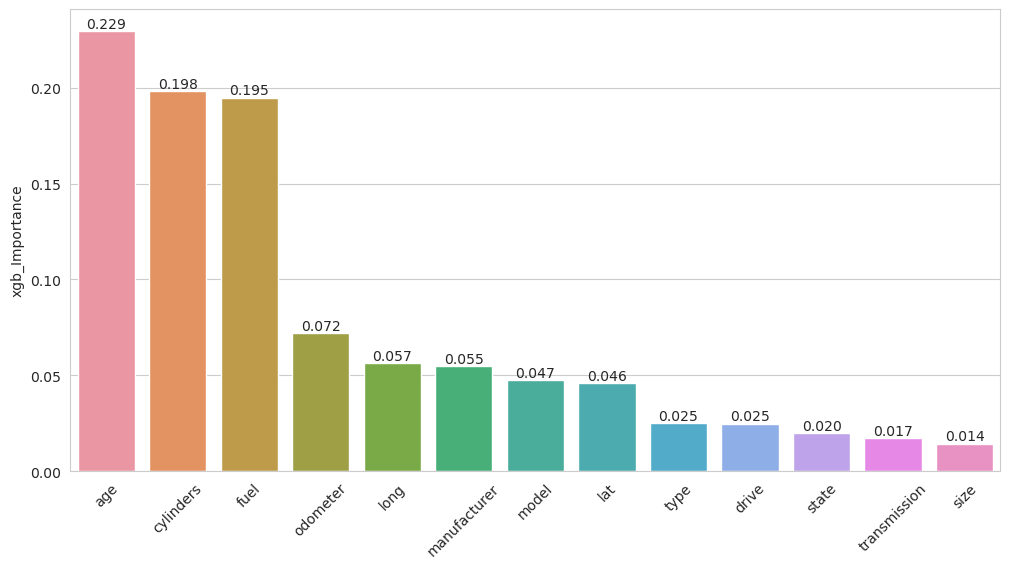

In [231]:
plt.figure(figsize=(12, 6))

ax = sns.barplot(data=xgb_imp_fea, x=xgb_imp_fea.index, y='xgb_Importance')
ax.bar_label(ax.containers[0], fmt="%.3f")
plt.xticks(rotation=45);

### ANN Model

#### Final Model

In [232]:
X_train.columns

Index(['manufacturer', 'model', 'transmission', 'fuel', 'odometer', 'state',
       'lat', 'long', 'age', 'cylinders', 'drive', 'size', 'type'],
      dtype='object')

In [233]:
X_new = df[['age', 'cylinders', 'fuel', 'odometer', 'long', 'manufacturer', 'model', 'lat']]

In [234]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=101)

In [235]:
cat_new = X_new.select_dtypes("object").columns

ord_enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

column_trans = make_column_transformer((ord_enc, cat_new),
                                       remainder='passthrough')

operations = [("OrdinalEncoder", column_trans),
              ("model_final",
               XGBRegressor(colsample_bytree=1,
                            learning_rate=0.1,
                            max_depth=6,
                            n_estimators=700,
                            subsample=0.8,
                            objective='reg:squarederror',
                            random_state=42,
                            tree_method='gpu_hist'))]

model_p_f = Pipeline(steps=operations)
model_p_f.fit(X_train, y_train)

train_val(model_p_f, X_train, y_train, X_test, y_test)

,train,test
R2,0.83,0.78
mae,3807.07,4148.53
mse,36898028.85,45882339.25
rmse,6074.37,6773.65


In [ ]:
# Final Model Results:

# 	train	test
# R2	0.83	0.78
# mae	3807.07	4148.53
# mse	36898028.85	45882339.25
# rmse	6074.37	6773.65

## Prediction

### Preprocess of Test Set

In [236]:
test.describe()

,id,year,odometer,lat,long
count,124341.00,124341.00,124341.00,122380.00,122380.00
mean,7311461560.46,2011.36,97705.89,38.51,-94.63
std,4395352.48,9.16,203002.40,5.83,18.33
min,7301583353.00,1900.00,0.00,-74.18,-159.59
25%,7308069236.00,2008.00,38000.00,34.71,-111.92
50%,7312518630.00,2014.00,85765.00,39.17,-88.34
75%,7315245906.00,2017.00,133812.00,42.43,-80.82
max,7317096748.00,2022.00,10000000.00,80.68,167.63


In [237]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 124341 entries, 316575 to 190395
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            124341 non-null  int64  
 1   year          124341 non-null  float64
 2   manufacturer  119488 non-null  object 
 3   model         124341 non-null  object 
 4   condition     74522 non-null   object 
 5   cylinders     72970 non-null   object 
 6   fuel          123696 non-null  object 
 7   odometer      124341 non-null  float64
 8   title_status  122132 non-null  object 
 9   transmission  124341 non-null  object 
 10  drive         86569 non-null   object 
 11  size          35237 non-null   object 
 12  type          97522 non-null   object 
 13  paint_color   86774 non-null   object 
 14  state         124341 non-null  object 
 15  lat           122380 non-null  float64
 16  long          122380 non-null  float64
 17  posting_date  124341 non-null  object 
dtyp

In [240]:
X.columns

Index(['manufacturer', 'model', 'transmission', 'fuel', 'odometer', 'state',
       'lat', 'long', 'age', 'cylinders', 'drive', 'size', 'type'],
      dtype='object')

In [241]:
# Convert the "posting_date" column to datetime with the corrected format (including time zone offset)
test['posting_date'] = pd.to_datetime(test['posting_date'], utc=True)

# Set the time zone to the desired one, for example, 'America/New_York'
test['posting_date'] = test['posting_date'].dt.tz_convert('America/New_York')  # UTC -04:00

test['posting_year'] = test['posting_date'].dt.year
test["age"] = test["posting_year"] - test["year"]

In [242]:
test["posting_date"].min(), test["posting_date"].max(), test["posting_date"].max() - test["posting_date"].min()

(Timestamp('2021-04-04 03:00:51-0400', tz='America/New_York'),
 Timestamp('2021-05-04 23:59:45-0400', tz='America/New_York'),
 Timedelta('30 days 20:58:54'))

#### Transmission

In [243]:
test["transmission"].value_counts(dropna=False)

automatic    98288
other        18742
manual        7311
Name: transmission, dtype: int64

In [244]:
test['transmission'] = test['transmission'].replace('other', np.NaN)

In [245]:
fill_missing(test, "transmission", ["manufacturer", "model", "drive", "type"])

In [246]:
test["transmission"].isnull().sum()

0

#### Fuel

In [247]:
test["fuel"].value_counts(dropna=False)

gas         104128
other         8892
diesel        8674
hybrid        1498
NaN            645
electric       504
Name: fuel, dtype: int64

In [248]:
test['fuel'] = test['fuel'].replace('other', np.NaN)

In [249]:
fill_missing(test, "fuel", "model")

In [250]:
test["fuel"].isnull().sum()

0

#### Type

In [251]:
test["type"].value_counts(dropna=False)

NaN            26819
sedan          25634
SUV            22569
pickup         12569
truck          10375
other           6138
coupe           5651
hatchback       4932
wagon           3148
van             2492
convertible     2246
mini-van        1445
offroad          172
bus              151
Name: type, dtype: int64

In [252]:
test['type'] = test['type'].replace('other', np.NaN)

In [253]:
fill_missing(test, "type", ["manufacturer", "model", "fuel", "cylinders"])

In [254]:
test["type"].isnull().sum()

0

#### Cylinders

In [255]:
# Use a regular expression to extract the numeric part from the "cylinders" column
test['cylinders'] = test['cylinders'].str.replace(r'(\d+)\s*cylinders', r'\1', regex=True)

# Replace "other" with 1
test['cylinders'] = test['cylinders'].replace('other', np.nan)

# Convert the "cylinders" column to numeric type
test['cylinders'] = pd.to_numeric(test['cylinders'], errors='coerce')

# The "cylinders" column now contains the desired numeric values and NaN for missing values

In [257]:
test.loc[test['fuel'] == 'electric', 'cylinders'] = 1

In [258]:
fill_missing(test, "cylinders", ["manufacturer", "model", "fuel", "drive"])

In [259]:
test["cylinders"].isnull().sum()

0

#### Latitude and Longitude

In [260]:
# Group by the "state" column and calculate the mode of "lat" and "long" for each state group
state_mode_lat = test.groupby('state')['lat'].transform(lambda x: x.mode().iloc[0])
state_mode_long = test.groupby('state')['long'].transform(lambda x: x.mode().iloc[0])

# Fill missing values in "lat" and "long" columns with the mode of each state group
test['lat'] = test['lat'].fillna(state_mode_lat)
test['long'] = test['long'].fillna(state_mode_long)

In [261]:
test[["lat", "long"]].isnull().sum()

lat     0
long    0
dtype: int64

#### Manufacturer

In [262]:
fill_missing(test, "manufacturer", "model")

In [263]:
test["manufacturer"].isnull().sum()

0

#### Drive

In [264]:
fill_missing(test, "drive", ["manufacturer", "model", "fuel", "cylinders"])

In [265]:
test["drive"].isnull().sum()

0

#### Size

In [266]:
fill_missing(test, "size", ["manufacturer", "model", "type"])

In [267]:
test["size"].isnull().sum()

0

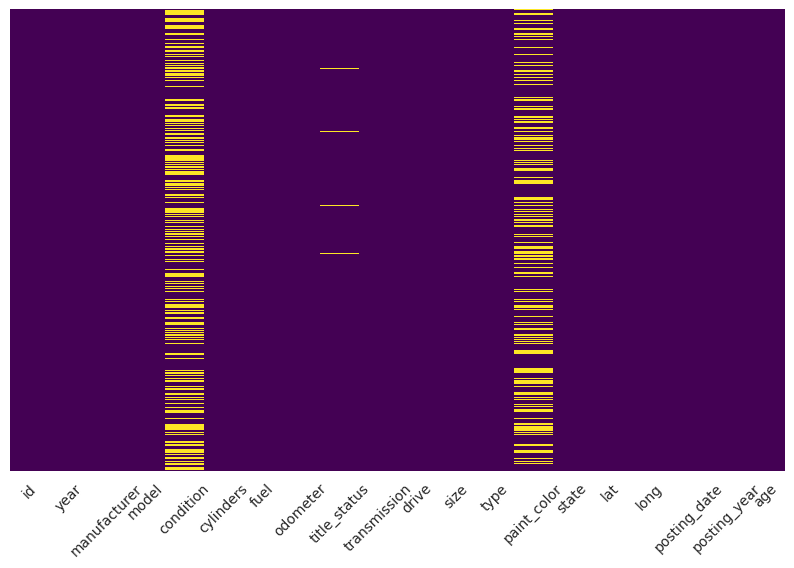

In [268]:
sns.heatmap(test.isnull(), yticklabels=False, cbar=False, cmap='viridis');
plt.xticks(rotation=45)
plt.show()

In [273]:
test.describe()

,id,year,cylinders,odometer,lat,long,posting_year,age
count,124341.00,124341.00,124341.00,124341.00,124341.00,124341.00,124341.00,124341.00
mean,7311461560.46,2011.36,5.93,97705.89,38.49,-94.44,2021.00,9.64
std,4395352.48,9.16,1.66,203002.40,5.81,18.28,0.00,9.16
min,7301583353.00,1900.00,1.00,0.00,-74.18,-159.59,2021.00,0.00
25%,7308069236.00,2008.00,4.00,38000.00,34.71,-111.70,2021.00,4.00
50%,7312518630.00,2014.00,6.00,85765.00,39.12,-88.07,2021.00,7.00
75%,7315245906.00,2017.00,8.00,133812.00,42.37,-80.66,2021.00,13.00
max,7317096748.00,2022.00,12.00,10000000.00,80.68,167.63,2021.00,121.00


In [ ]:
# test.drop(test[test['odometer'] > 1000000].index, axis=0, inplace=True)

In [ ]:
# test.drop(test[test['year'] < 1945].index, axis=0, inplace=True)

In [ ]:
# test.drop(test[test["age"] < 0].index, axis=0, inplace=True)

In [272]:
test['age'] = test['age'].replace(-1, 0)

In [ ]:
# test.drop(test[test['age'] > 56].index, axis=0, inplace=True)

In [ ]:
# test.drop(test[test['price'] > 90000].index, axis=0, inplace=True)

In [274]:
corr = test[['odometer', 'year', 'age', 'cylinders']].corr()

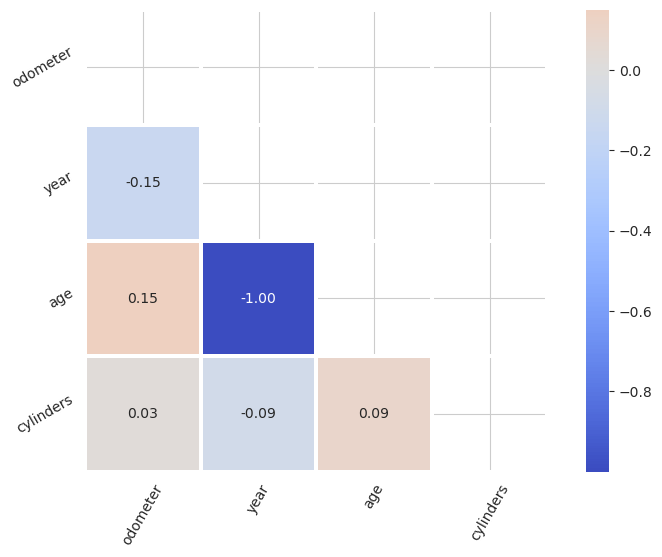

In [275]:
mask = np.triu(np.ones_like(corr, dtype=bool))

sns.heatmap(corr, mask=mask, cmap='coolwarm', ax=None, linewidths=1.5, center=0, annot=True,
            fmt='.2f', square=True, xticklabels=(corr.index), yticklabels=(corr.columns))

plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.grid('off')
plt.show()

In [276]:
test.columns

Index(['id', 'year', 'manufacturer', 'model', 'condition', 'cylinders', 'fuel',
       'odometer', 'title_status', 'transmission', 'drive', 'size', 'type',
       'paint_color', 'state', 'lat', 'long', 'posting_date', 'posting_year',
       'age'],
      dtype='object')

In [277]:
test.drop(["posting_year", "title_status", "condition", "paint_color"], axis=1, inplace=True)

In [ ]:
# test.sort_values(by="posting_date", inplace=True)

In [278]:
test.reset_index(inplace=True)

In [279]:
test.isnull().sum().sort_values(ascending=False)

index           0
drive           0
posting_date    0
long            0
lat             0
state           0
type            0
size            0
transmission    0
id              0
odometer        0
fuel            0
cylinders       0
model           0
manufacturer    0
year            0
age             0
dtype: int64

In [280]:
test.shape, submission.shape

((124341, 17), (124341, 2))

In [282]:
X.columns

Index(['manufacturer', 'model', 'transmission', 'fuel', 'odometer', 'state',
       'lat', 'long', 'age', 'cylinders', 'drive', 'size', 'type'],
      dtype='object')

In [283]:
test.columns

Index(['index', 'id', 'year', 'manufacturer', 'model', 'cylinders', 'fuel',
       'odometer', 'transmission', 'drive', 'size', 'type', 'state', 'lat',
       'long', 'posting_date', 'age'],
      dtype='object')

In [285]:
test["pred"] = model_p_f.predict(test[X.columns])

## Submission

In [281]:
submission

,id,Target
0,7313399730,0.00
1,7308035814,0.00
2,7317063645,0.00
3,7310376764,0.00
4,7309848062,0.00
...,...,...
124336,7306681704,0.00
124337,7315798680,0.00
124338,7314818147,0.00
124339,7308055654,0.00


In [286]:
submission = test[["id", "pred"]]
submission

,id,pred
0,7313399730,-2100.72
1,7308035814,26647.04
2,7317063645,6064.49
3,7310376764,22502.21
4,7309848062,28534.92
...,...,...
124336,7306681704,46366.85
124337,7315798680,8621.22
124338,7314818147,9334.92
124339,7308055654,5147.40


In [287]:
submission.to_csv("submission.csv", index=False)